In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [4]:
df = pd.read_csv('/kaggle/input/playground-series-s3e24/train.csv')

In [5]:
df.sample(10)

id  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
115378  115378   40         155          55       73.0             1.0   
127026  127026   40         170          75       85.6             1.0   
98278    98278   40         160          60       72.6             1.5   
4538      4538   20         180          75       80.0             0.9   
64084    64084   25         165          75       86.0             0.8   
97123    97123   65         160          55       78.0             1.5   
148071  148071   55         170          65       80.0             0.7   
129932  129932   50         170          75       86.0             1.0   
71059    71059   50         165          45       70.0             1.0   
87632    87632   55         145          50       74.5             0.6   

        eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
115378              0.8              1               1       135          85   
127026              1.0              1               1       138          82   
98278               1.5              1               1       112          65   
4538                1.2              1               1       118          78   
64084               0.9              1               1       127          84   
97123               1.0              1               1       130          85   
148071              0.9              1               1       139          88   
129932              1.0              1               1       119          63   
71059               1.2              1               1       125          89   
87632               0.8              1               1       109          79   

        fasting blood sugar  Cholesterol  triglyceride  HDL  LDL  hemoglobin  \
115378                   93          269           232   56  166        14.2   
127026                   98          270           282   45  166        17.7   
98278                    84          230           154   57  142        12.8   
4538                     81          173            52   77   86        15.6   
64084                   102          177           169   50   92        14.7   
97123                    95          199            90   58  123        14.8   
148071                  119          226           142   63  134        15.5   
129932                   78          193           259   44   98        15.1   
71059                   174          154           185   49   68        13.8   
87632                    87          180           163   43  104        13.2   

        Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  smoking  
115378              1               0.7   19   16   23              0        0  
127026              1               1.1   26   28   96              0        0  
98278               1               0.7   15    8   22              0        0  
4538                1               0.8   36   28   26              0        0  
64084               1               0.8   15   21   37              1        1  
97123               1               1.1   34   26   28              0        1  
148071              1               0.8   29   23   65              1        1  
129932              1               0.8   26   21   21              0        1  
71059               1               1.1   25   12   33              0        1  
87632               1               0.8   23   17   18              0        0

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

In [ ]:
df.duplicated().any()

In [ ]:
df['smoking'].value_counts()

In [ ]:
sns.countplot(df, x='smoking')

In [ ]:
plt.figure(figsize=(14, 14), dpi=150)
sns.pairplot(df, hue='smoking')

In [ ]:
plt.figure(figsize=(18, 18), dpi=150)
sns.heatmap(df.drop('id', axis=1).corr(), annot=True)

In [ ]:
plt.figure(figsize=(18, 18), dpi=150)
sns.heatmap(df.drop('id', axis=1).corr(method='spearman'), annot=True)

In [ ]:
df[['waist(cm)', 'weight(kg)']].sample(10)

In [ ]:
sns.scatterplot(df, x='waist(cm)', y='weight(kg)', hue='smoking')

In [ ]:
sns.scatterplot(df, x='relaxation', y='systolic', hue='smoking')

In [ ]:
sns.kdeplot(df, x='height(cm)', hue='smoking')

In [ ]:
df.columns

In [ ]:
sns.boxplot(df, x='height(cm)')

In [ ]:
sns.boxplot(df, x='systolic')

In [6]:
df = df.drop('id', axis=1)

In [7]:
X = df.drop('smoking', axis=1)
y = df['smoking']

In [8]:
X

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0        55         165          60       81.0             0.5   
1        70         165          65       89.0             0.6   
2        20         170          75       81.0             0.4   
3        35         180          95      105.0             1.5   
4        30         165          60       80.5             1.5   
...     ...         ...         ...        ...             ...   
159251   40         155          45       69.0             1.5   
159252   50         155          75       82.0             1.0   
159253   40         160          50       66.0             1.5   
159254   50         165          75       92.0             1.2   
159255   40         145          45       76.4             1.0   

        eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
0                   0.6              1               1       135          87   
1                   0.7              2               2       146          83   
2                   0.5              1               1       118          75   
3                   1.2              1               1       131          88   
4                   1.0              1               1       121          76   
...                 ...            ...             ...       ...         ...   
159251              2.0              1               1       127          80   
159252              1.0              1               1       120          80   
159253              1.0              1               1       114          70   
159254              1.0              1               1       121          90   
159255              1.2              1               1       125          87   

        fasting blood sugar  Cholesterol  triglyceride  HDL  LDL  hemoglobin  \
0                        94          172           300   40   75        16.5   
1                       147          194            55   57  126        16.2   
2                        79          178           197   45   93        17.4   
3                        91          180           203   38  102        15.9   
4                        91          155            87   44   93        15.4   
...                     ...          ...           ...  ...  ...         ...   
159251                   64          238            47   72  159        14.5   
159252                   89          213           202   64  108        14.5   
159253                   84          189            45   87   93        10.9   
159254                  122          165           148   55   80        14.4   
159255                   83          186            87   87   81        14.0   

        Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  
0                   1               1.0   22   25   27              0  
1                   1               1.1   27   23   37              1  
2                   1               0.8   27   31   53              0  
3                   1               1.0   20   27   30              1  
4                   1               0.8   19   13   17              0  
...               ...               ...  ...  ...  ...            ...  
159251              1               0.8   25   26   13              0  
159252              1               0.6   21   20   18              0  
159253              1               0.6   15    9   12              0  
159254              1               1.1   22   17   37              0  
159255              1               0.8   21   16   17              0  

[159256 rows x 22 columns]

In [9]:
y

0         1
1         0
2         1
3         0
4         1
         ..
159251    0
159252    0
159253    0
159254    1
159255    0
Name: smoking, Length: 159256, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [28]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [36]:
robust_scaler = RobustScaler()
rbscaled_X_train = robust_scaler.fit_transform(X_train)
rbscaled_X_test = robust_scaler.transform(X_test)

In [10]:
logistic_model = LogisticRegression(max_iter=1000000, n_jobs=-1, penalty='elasticnet')

In [ ]:
param_grid  = {'solver': ['lbfgs', 'saga'], 'C': [0.01, 1, 10, 100], 'l1_ratio': [0, 0.01, 0.1, 0.5, 1]}

In [ ]:
grid_log_model = GridSearchCV(logistic_model, param_grid, scoring='accuracy', n_jobs=-1, cv=10, verbose=1, return_train_score=True)

In [ ]:
grid_log_model.fit(scaled_X_train, y_train)

In [ ]:
grid_log_model.best_estimator_.get_params()

In [ ]:
y_pred = grid_log_model.predict(scaled_X_test)

In [ ]:
y_pred

In [12]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, roc_curve, RocCurveDisplay

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid_log_model, scaled_X_test, y_test)

In [12]:
dt = DecisionTreeClassifier()

In [ ]:
grid_params = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5],
              'min_samples_split': [20, 25],
              'min_samples_leaf' : [30, 35, 40]}

In [ ]:
tree_grid = GridSearchCV(dt, cv=10, param_grid=grid_params, scoring='accuracy', n_jobs=-1, verbose=2)
tree_grid.fit(X_train, y_train)
print('Best Parameters using grid search: \n', tree_grid.best_params_)

In [ ]:
y_pred = tree_grid.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
ConfusionMatrixDisplay.from_estimator(tree_grid, X_test, y_test)

In [13]:
rforest = RandomForestClassifier(random_state=101, oob_score=True)

In [ ]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5],
              'min_samples_split': [20, 25],
              'min_samples_leaf' : [30, 35, 40]
             }
rforest_grid = GridSearchCV(rforest, cv=10, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
rforest_grid.fit(X_train, y_train)
print('Best Parameters using grid search: \n', rforest_grid.best_params_)

In [14]:
rforest.set_params(criterion = 'gini',
                  min_samples_leaf = 40,
                  min_samples_split = 20,
                  max_depth = 5)

RandomForestClassifier(max_depth=5, min_samples_leaf=40, min_samples_split=20,
                       oob_score=True, random_state=101)

In [ ]:
min_estimators = 300
max_estimators = 500

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rforest.set_params(n_estimators=i)
    rforest.fit(scaled_X_train, y_train)
    rf_predict = rforest.predict(scaled_X_test)
    error_rate[i] = 1 - accuracy_score(y_test, rf_predict)

In [ ]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.xlim(100, 300)
plt.title('OOB Error Rate Across various Forest sizes \n(From 100 to 300 trees)')

In [ ]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.xlim(300, 500)
plt.title('OOB Error Rate Across various Forest sizes \n(From 300 to 500 trees)')

In [15]:
rforest.set_params(n_estimators=410)

RandomForestClassifier(max_depth=5, min_samples_leaf=40, min_samples_split=20,
                       n_estimators=410, oob_score=True, random_state=101)

In [16]:
rforest.fit(scaled_X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=40, min_samples_split=20,
                       n_estimators=410, oob_score=True, random_state=101)

In [17]:
y_predict = rforest.predict(scaled_X_test)

In [18]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76     13401
           1       0.68      0.82      0.75     10488

    accuracy                           0.75     23889
   macro avg       0.76      0.76      0.75     23889
weighted avg       0.77      0.75      0.76     23889



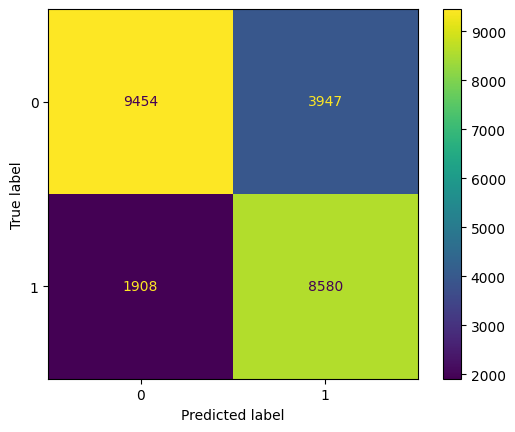

In [19]:
ConfusionMatrixDisplay.from_estimator(rforest, scaled_X_test, y_test)

In [22]:
roc_curve(y_test, y_predict)

(array([0.        , 0.29453026, 1.        ]),
 array([0.       , 0.8180778, 1.       ]),
 array([2, 1, 0]))

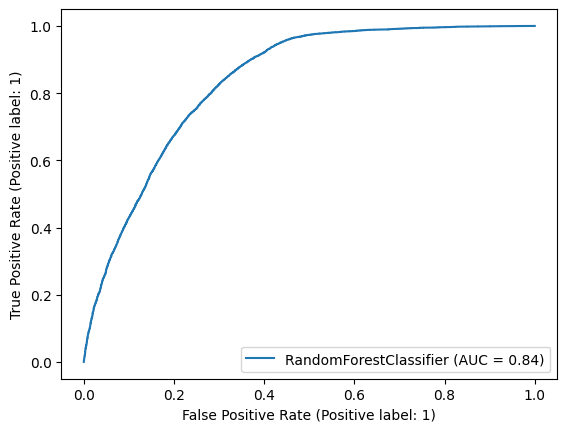

In [23]:
RocCurveDisplay.from_estimator(rforest, scaled_X_test, y_test)

In [ ]:
df_test = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')

In [ ]:
df_test.sample(10)

In [ ]:
df_test.set_index('id', inplace=True)

In [ ]:
scaled_test_df = scaler.transform(df_test)

In [ ]:
rforest.predict(scaled_test_df)

In [ ]:
rforest.classes_

In [ ]:
rforest.predict_proba(scaled_test_df)[:,1]

In [ ]:
df_test['smoking'] = rforest.predict_proba(scaled_test_df)[:,1]

In [ ]:
df_test.sample(10)

In [ ]:
df_test = df_test.reset_index()

In [ ]:
df_test[['id', 'smoking']].to_csv('/kaggle/working/output.csv', index=False)

In [24]:
adaboost = AdaBoostClassifier()

In [ ]:
estimators = [100, 150, 200, 250, 300, 350, 400, 450, 500]

error_rate = {}

for i in estimators:
    adaboost.set_params(n_estimators=i)
    adaboost.fit(scaled_X_train, y_train)
    ada_predict = adaboost.predict(scaled_X_test)
    error_rate[i] = 1 - accuracy_score(y_test, ada_predict)

In [ ]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.xlim(100, 500)
plt.title('OOB Error Rate Across various Forest sizes \n(From 100 to 500 trees)')

In [ ]:
estimators = [500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]

error_rate = {}

for i in estimators:
    adaboost.set_params(n_estimators=i)
    adaboost.fit(scaled_X_train, y_train)
    ada_predict = adaboost.predict(scaled_X_test)
    error_rate[i] = 1 - accuracy_score(y_test, ada_predict)

In [ ]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.xlim(500, 1000)
plt.title('OOB Error Rate Across various Forest sizes \n(From 500 to 1000 trees)')

In [25]:
adaboost.set_params(n_estimators=650)

AdaBoostClassifier(n_estimators=650)

In [26]:
adaboost.fit(scaled_X_train, y_train)

AdaBoostClassifier(n_estimators=650)

In [27]:
y_predict = adaboost.predict(scaled_X_test)

In [28]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79     13401
           1       0.72      0.79      0.75     10488

    accuracy                           0.77     23889
   macro avg       0.77      0.78      0.77     23889
weighted avg       0.78      0.77      0.78     23889



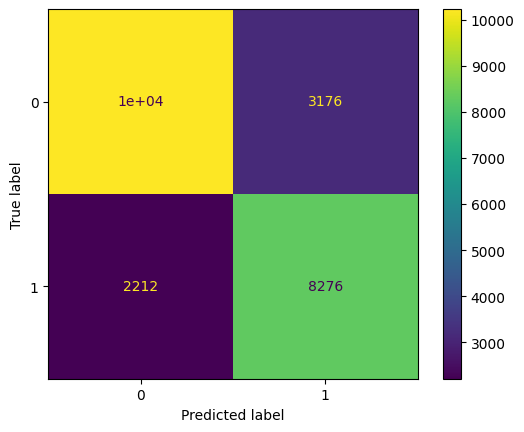

In [29]:
ConfusionMatrixDisplay.from_estimator(adaboost, scaled_X_test, y_test)

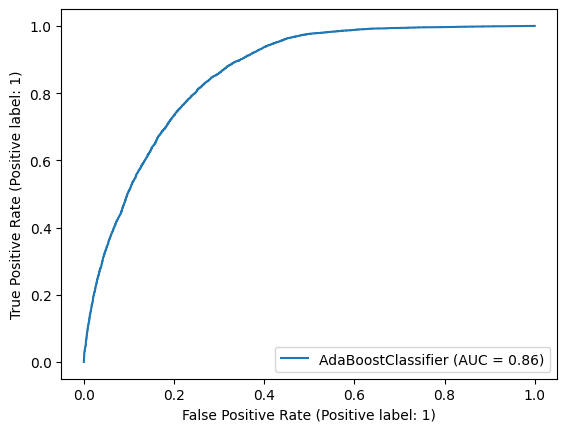

In [30]:
RocCurveDisplay.from_estimator(adaboost, scaled_X_test, y_test)

In [ ]:
df_test = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')

In [ ]:
df_test.set_index('id', inplace=True)

In [ ]:
scaled_test_df = scaler.transform(df_test)

In [ ]:
adaboost.predict(scaled_test_df)

In [ ]:
adaboost.predict_proba(scaled_test_df)[:,1]

In [ ]:
df_test['smoking'] = adaboost.predict_proba(scaled_test_df)[:,1]

In [ ]:
df_test = df_test.reset_index()

In [ ]:
df_test[['id', 'smoking']].to_csv('/kaggle/working/adaboost_output.csv', index=False)

In [31]:
gradboost = GradientBoostingClassifier()

In [ ]:
param_grid = {'max_depth': [3, 4, 5, 6],
              'min_samples_split': [20, 25],
              'min_samples_leaf' : [30, 35, 40]
             }
gradboost_grid = GridSearchCV(gradboost, cv=10, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
gradboost_grid.fit(scaled_X_train, y_train)
print('Best Parameters using grid search: \n', gradboost_grid.best_params_)

In [32]:
gradboost.set_params(min_samples_leaf = 30,
                  min_samples_split = 20,
                  max_depth = 7)

GradientBoostingClassifier(max_depth=7, min_samples_leaf=30,
                           min_samples_split=20)

In [ ]:
estimators = [100, 150, 200, 250, 300, 350, 400, 450, 500]

error_rate = {}

for i in estimators:
    gradboost.set_params(n_estimators=i)
    gradboost.fit(scaled_X_train, y_train)
    grad_predict = gradboost.predict(scaled_X_test)
    error_rate[i] = 1 - accuracy_score(y_test, grad_predict)

In [ ]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.xlim(100, 500)
plt.title('OOB Error Rate Across various Forest sizes \n(From 100 to 500 trees)')

In [ ]:
estimators = [500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]

error_rate = {}

for i in estimators:
    gradboost.set_params(n_estimators=i)
    gradboost.fit(scaled_X_train, y_train)
    grad_predict = gradboost.predict(scaled_X_test)
    error_rate[i] = 1 - accuracy_score(y_test, grad_predict)

In [ ]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.xlim(500, 1000)
plt.title('OOB Error Rate Across various Forest sizes \n(From 500 to 1000 trees)')

In [33]:
gradboost.set_params(n_estimators=500)

GradientBoostingClassifier(max_depth=7, min_samples_leaf=30,
                           min_samples_split=20, n_estimators=500)

In [34]:
gradboost.fit(scaled_X_train, y_train)

GradientBoostingClassifier(max_depth=7, min_samples_leaf=30,
                           min_samples_split=20, n_estimators=500)

In [35]:
y_predict = gradboost.predict(scaled_X_test)

In [36]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80     13401
           1       0.73      0.81      0.77     10488

    accuracy                           0.79     23889
   macro avg       0.78      0.79      0.78     23889
weighted avg       0.79      0.79      0.79     23889



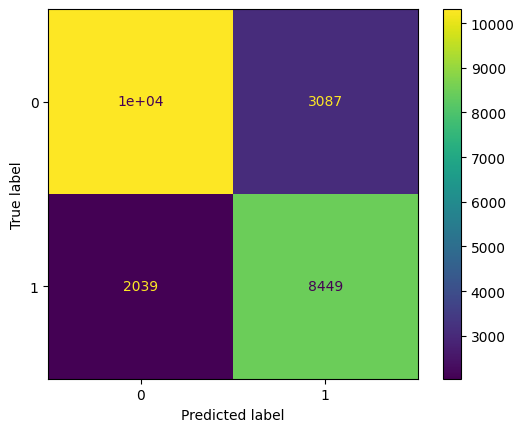

In [37]:
ConfusionMatrixDisplay.from_estimator(gradboost, scaled_X_test, y_test)

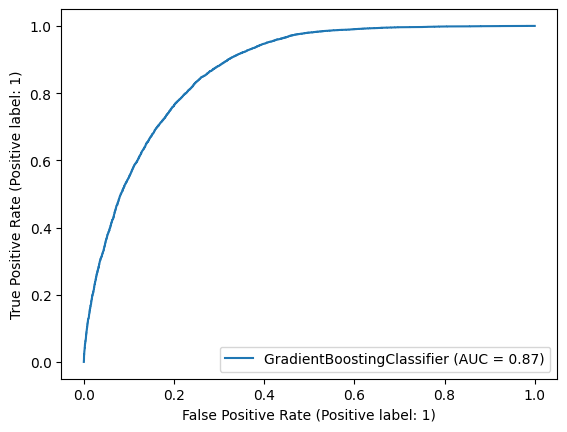

In [38]:
RocCurveDisplay.from_estimator(gradboost, scaled_X_test, y_test)

In [ ]:
df_test = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')
df_test.set_index('id', inplace=True)
scaled_test_df = scaler.transform(df_test)
df_test['smoking'] = gradboost.predict_proba(scaled_test_df)[:,1]
df_test = df_test.reset_index()
df_test[['id', 'smoking']].to_csv('/kaggle/working/gradboost_output.csv', index=False)

In [39]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [46]:
vc = VotingClassifier(estimators=[('rf', rforest), ('gb', gradboost), ('ab', adaboost)], n_jobs=-1, voting="soft")

In [47]:
vc.fit(scaled_X_train, y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=5,
                                                     min_samples_leaf=40,
                                                     min_samples_split=20,
                                                     n_estimators=410,
                                                     oob_score=True,
                                                     random_state=101)),
                             ('gb',
                              GradientBoostingClassifier(max_depth=7,
                                                         min_samples_leaf=30,
                                                         min_samples_split=20,
                                                         n_estimators=500)),
                             ('ab', AdaBoostClassifier(n_estimators=650))],
                 n_jobs=-1, voting='soft')

In [48]:
y_predict = vc.predict(scaled_X_test)

In [49]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80     13401
           1       0.72      0.83      0.77     10488

    accuracy                           0.78     23889
   macro avg       0.79      0.79      0.78     23889
weighted avg       0.79      0.78      0.78     23889



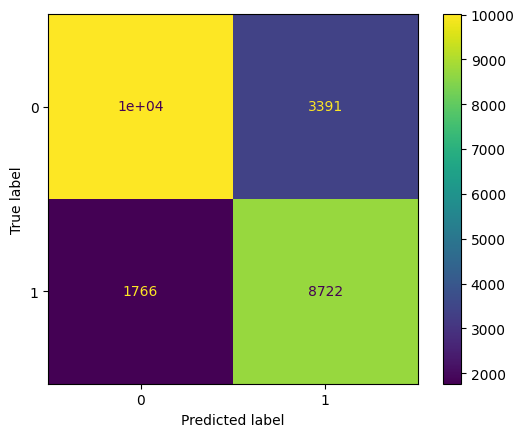

In [50]:
ConfusionMatrixDisplay.from_estimator(vc, scaled_X_test, y_test)

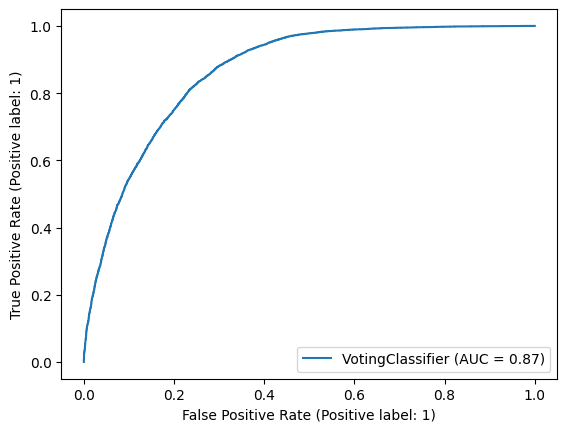

In [51]:
RocCurveDisplay.from_estimator(vc, scaled_X_test, y_test)

In [52]:
df_test = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')
df_test.set_index('id', inplace=True)
scaled_test_df = scaler.transform(df_test)
df_test['smoking'] = vc.predict_proba(scaled_test_df)[:,1]
df_test = df_test.reset_index()
df_test[['id', 'smoking']].to_csv('/kaggle/working/voting_output.csv', index=False)

In [54]:
estimators=[('rf', rforest), ('gb', gradboost), ('ab', adaboost), ('svc', SVC(kernel='rbf'), ('xgboost', xgb.XGBClassifier(max_depth=7, n_estimators=600)))]

In [57]:
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), n_jobs=-1)

In [58]:
clf.fit(scaled_X_train, y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=5,
                                                       min_samples_leaf=40,
                                                       min_samples_split=20,
                                                       n_estimators=410,
                                                       oob_score=True,
                                                       random_state=101)),
                               ('gb',
                                GradientBoostingClassifier(max_depth=7,
                                                           min_samples_leaf=30,
                                                           min_samples_split=20,
                                                           n_estimators=500)),
                               ('ab', AdaBoostClassifier(n_estimators=650)),
                               ('svc', SVC(),
                                ('xgboost',
                                 XGBClassifier...
                                               interaction_constraints=None,
                                               learning_rate=None, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None, max_depth=7,
                                               max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               n_estimators=600, n_jobs=None,
                                               num_parallel_tree=None,
                                               predictor=None,
                                               random_state=None, ...)))],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [59]:
y_predict = clf.predict(scaled_X_test)

In [60]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80     13401
           1       0.73      0.80      0.77     10488

    accuracy                           0.79     23889
   macro avg       0.78      0.79      0.78     23889
weighted avg       0.79      0.79      0.79     23889



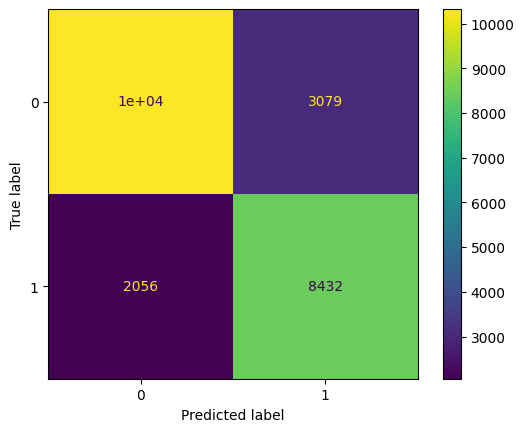

In [61]:
ConfusionMatrixDisplay.from_estimator(clf, scaled_X_test, y_test)

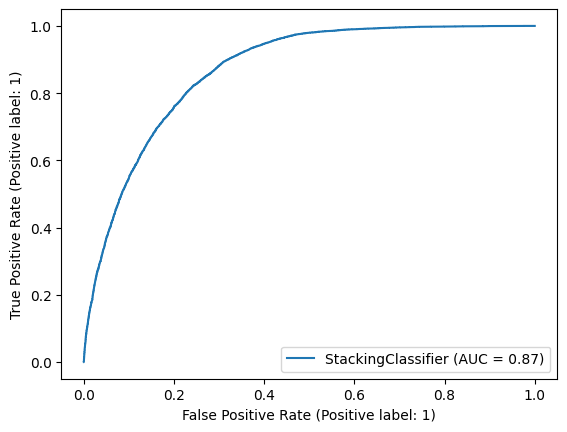

In [62]:
RocCurveDisplay.from_estimator(clf, scaled_X_test, y_test)

In [63]:
df_test = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')
df_test.set_index('id', inplace=True)
scaled_test_df = scaler.transform(df_test)
df_test['smoking'] = clf.predict_proba(scaled_test_df)[:,1]
df_test = df_test.reset_index()
df_test[['id', 'smoking']].to_csv('/kaggle/working/stacked_output.csv', index=False)

In [13]:
from lightgbm import LGBMClassifier

In [29]:
lgb_model = LGBMClassifier(max_depth=6, n_estimators=600, reg_lambda=0.1, n_jobs=-1, )

In [37]:
lgb_rb_model = LGBMClassifier(max_depth=6, n_estimators=600, reg_lambda=0.1, n_jobs=-1, )

In [30]:
lgb_model.fit(scaled_X_train, y_train)

LGBMClassifier(max_depth=6, n_estimators=600, reg_lambda=0.1)

In [38]:
lgb_rb_model.fit(rbscaled_X_train, y_train)

LGBMClassifier(max_depth=6, n_estimators=600, reg_lambda=0.1)

In [39]:
y_predict = lgb_model.predict(scaled_X_test)

In [40]:
y_predict_rb = lgb_rb_model.predict(rbscaled_X_test)

In [41]:
print(classification_report(y_test, y_predict_rb))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80      8947
           1       0.73      0.81      0.77      6979

    accuracy                           0.79     15926
   macro avg       0.78      0.79      0.78     15926
weighted avg       0.79      0.79      0.79     15926



In [32]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80      8947
           1       0.73      0.81      0.77      6979

    accuracy                           0.79     15926
   macro avg       0.78      0.79      0.78     15926
weighted avg       0.79      0.79      0.79     15926



In [42]:
ConfusionMatrixDisplay.from_estimator(lgb_rb_model, rbscaled_X_test, y_test)

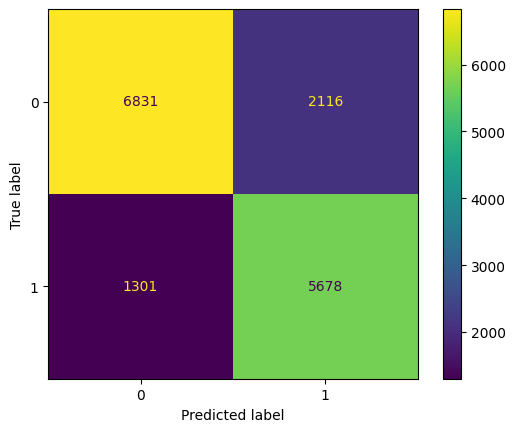

In [33]:
ConfusionMatrixDisplay.from_estimator(lgb_model, scaled_X_test, y_test)

In [43]:
RocCurveDisplay.from_estimator(lgb_rb_model, rbscaled_X_test, y_test)

In [34]:
RocCurveDisplay.from_estimator(lgb_model, scaled_X_test, y_test)

In [46]:
x_all = robust_scaler.fit_transform(X)

In [47]:
lgb_rb_model.fit(x_all, y)

LGBMClassifier(max_depth=6, n_estimators=600, reg_lambda=0.1)

In [48]:
df_test = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')
df_test.set_index('id', inplace=True)
scaled_test_df = scaler.transform(df_test)
df_test['smoking'] = lgb_rb_model.predict_proba(scaled_test_df)[:,1]
df_test = df_test.reset_index()
df_test[['id', 'smoking']].to_csv('/kaggle/working/lgb_rb_output.csv', index=False)

In [ ]:
svc = SVC(kernel='rbf')

In [ ]:
param_grid = {
   'C': [0.1, 1, 10, 100] 
}

In [ ]:
svc_grid = GridSearchCV(svc, cv=10, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
svc_grid.fit(scaled_X_train, y_train)
print('Best Parameters using grid search: \n', svc_grid.best_params_)

In [ ]:
!pip install xgboost

In [53]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBClassifier(n_jobs=-1)

In [ ]:
param_grid = {'max_depth': [4, 5, 6, 7]}

In [ ]:
xgb_grid_model = GridSearchCV(xgb_model, param_grid, scoring='accuracy', cv=10, n_jobs=-1)

In [ ]:
xgb_grid_model.fit(scaled_X_train, y_train)

In [ ]:
xgb_grid_model.best_estimator_.get_params()

In [ ]:
xgb_grid_model.best_params_

In [ ]:
xgb_model.set_params(max_depth = 5)

In [ ]:
estimators = [300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]

error_rate = {}

for i in estimators:
    xgb_model.set_params(n_estimators=i)
    xgb_model.fit(scaled_X_train, y_train)
    xgb_predict = xgb_model.predict(scaled_X_test)
    error_rate[i] = 1 - accuracy_score(y_test, xgb_predict)

In [ ]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.xlim(300, 800)
plt.title('OOB Error Rate Across various Forest sizes \n(From 300 to 800 trees)')

In [ ]:
estimators = [800, 850, 900, 950, 1000]

error_rate = {}

for i in estimators:
    xgb_model.set_params(n_estimators=i)
    xgb_model.fit(scaled_X_train, y_train)
    xgb_predict = xgb_model.predict(scaled_X_test)
    error_rate[i] = 1 - accuracy_score(y_test, xgb_predict)

In [ ]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.xlim(800, 1000)
plt.title('OOB Error Rate Across various Forest sizes \n(From 800 to 1000 trees)')

In [ ]:
import catboost as cb

In [ ]:
train_dataset = cb.Pool(scaled_X_train, y_train)
test_dataset = cb.Pool(scaled_X_test, y_test)

In [ ]:
model = cb.CatBoostClassifier()

In [ ]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

In [ ]:
pred = model.predict(scaled_X_test)

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, scaled_X_test, y_test)

In [ ]:
RocCurveDisplay.from_estimator(model, scaled_X_test, y_test)

In [ ]:
df_test = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')
df_test.set_index('id', inplace=True)
scaled_test_df = scaler.transform(df_test)
df_test['smoking'] = model.predict_proba(scaled_test_df)[:,1]
df_test = df_test.reset_index()
df_test[['id', 'smoking']].to_csv('/kaggle/working/catboost_output.csv', index=False)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [ ]:
model = Sequential()

model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1024,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2000,activation='relu'))
model.add(Dense(1))

model.compile(optimizer=tf.keras.optimizers.AdamW(), loss='binary_crossentropy', metrics=['accuracy'])     

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [ ]:
model.fit(scaled_X_train, y_train, validation_data=(X_test, y_test), batch_size=128, callbacks=[early_stop], validation_batch_size=128, epochs=100)

In [50]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 17.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 73.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 78.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 42.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 67.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [51]:
from pycaret.classification import *

In [52]:
df.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
0   55         165          60       81.0             0.5              0.6   
1   70         165          65       89.0             0.6              0.7   
2   20         170          75       81.0             0.4              0.5   
3   35         180          95      105.0             1.5              1.2   
4   30         165          60       80.5             1.5              1.0   

   hearing(left)  hearing(right)  systolic  relaxation  fasting blood sugar  \
0              1               1       135          87                   94   
1              2               2       146          83                  147   
2              1               1       118          75                   79   
3              1               1       131          88                   91   
4              1               1       121          76                   91   

   Cholesterol  triglyceride  HDL  LDL  hemoglobin  Urine protein  \
0          172           300   40   75        16.5              1   
1          194            55   57  126        16.2              1   
2          178           197   45   93        17.4              1   
3          180           203   38  102        15.9              1   
4          155            87   44   93        15.4              1   

   serum creatinine  AST  ALT  Gtp  dental caries  smoking  
0               1.0   22   25   27              0        1  
1               1.1   27   23   37              1        0  
2               0.8   27   31   53              0        1  
3               1.0   20   27   30              1        0  
4               0.8   19   13   17              0        1

In [53]:
data = df.sample(frac=0.90, random_state=101)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (143330, 23)
Unseen Data For Predictions: (15926, 23)


In [54]:
model = setup(data = data, target = 'smoking', session_id=123, transformation=True, remove_multicollinearity=True, use_gpu=True)

In [55]:
best = compare_models(exclude = ['ransac'])

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

[I] [10:40:20.367949] Unused keyword parameter: n_jobs during cuML estimator initialization


In [56]:
catboost = create_model('catboost')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [57]:
tuned_catboost = tune_model(catboost)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
plot_model(catboost)

In [ ]:
final_catboost = finalize_model(catboost)

In [ ]:
df_test = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')
df_test.set_index('id', inplace=True)

In [ ]:
unseen_predictions = predict_model(final_catboost, data=df_test, raw_score=True)
unseen_predictions.head()

In [ ]:
unseen_predictions = unseen_predictions.reset_index()
unseen_predictions = unseen_predictions.rename(columns={'prediction_score_1': 'smoking'})
unseen_predictions[['id', 'smoking']].to_csv('/kaggle/working/pycaret.csv', index=False)

In [ ]:
!pip install h2o
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init(nthreads=-1)

In [ ]:
df_test = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')
df_test.set_index('id', inplace=True)

In [ ]:
df_test.head()

In [ ]:
df.sample(5)

In [ ]:
df['smoking'] = df['smoking'].astype('category')

In [ ]:
df.info()

In [ ]:
train = h2o.H2OFrame(df)

In [ ]:
train['smoking'] = train['smoking'].asfactor()

In [ ]:
train, valid= train.split_frame(ratios = [.85], seed = 1234)

In [ ]:
test = h2o.H2OFrame(df_test)

In [ ]:
x = train.columns
y = "smoking"
x.remove(y)

In [ ]:
aml = H2OAutoML(max_models=30, seed=1, stopping_metric='auc', )
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

In [ ]:
preds = aml.leader.predict(valid, )

In [ ]:
preds

In [ ]:
preds = aml.leader.predict(test, )

In [ ]:
preds

In [ ]:
valid_df = test.cbind(preds)
valid_df.head(2)

In [ ]:
test_pred = valid_df.as_data_frame()

In [ ]:
test_pred.head()

In [ ]:
test_pred[['p1']].to_csv('/kaggle/working/h20.csv', index=False)

<h2>Outlier Treatment

In [ ]:
for ele in df.drop('smoking', axis=1).columns:
    plt.figure(figsize=(8, 8), dpi=150)
    sns.boxplot(df, x=ele)

In [ ]:
df.columns

In [ ]:
sns.boxplot(data=df, y='age')

In [5]:
age_q1 = np.percentile(df['age'], q=25)
age_q3 = np.percentile(df['age'], q=75)
age_iqr = age_q3 - age_q1
lower_age = age_q1 - (1.5 * age_iqr)
upper_age = age_q3 + (1.5 * age_iqr)

In [6]:
lower_age

17.5

In [7]:
upper_age

77.5

In [8]:
df['age'] = np.where(df['age'] > upper_age, upper_age, df['age'])

In [9]:
df['age'] = np.where(df['age'] < lower_age, lower_age, df['age'])

In [10]:
sns.boxplot(data=df, y='age')

<Axes: ylabel='age'>

In [11]:
sns.boxplot(df, y='height(cm)')

<Axes: ylabel='height(cm)'>

In [12]:
height_q1 = np.percentile(df['height(cm)'], q=25)
height_q3 = np.percentile(df['height(cm)'], q=75)
height_iqr = height_q3 - height_q1
lower_height = height_q1 - (1.5 * height_iqr)
upper_height = height_q3 + (1.5 * height_iqr)

In [13]:
df['height(cm)'] = np.where(df['height(cm)'] > upper_height, upper_height, df['height(cm)'])
df['height(cm)'] = np.where(df['height(cm)'] < lower_height, lower_height, df['height(cm)'])

In [14]:
sns.boxplot(df, y='height(cm)')

<Axes: ylabel='height(cm)'>

In [15]:
sns.boxplot(df, y='weight(kg)')

<Axes: ylabel='weight(kg)'>

In [16]:
weight_q1 = np.percentile(df['weight(kg)'], q=25)
weight_q3 = np.percentile(df['weight(kg)'], q=75)
weight_iqr = weight_q3 - weight_q1
lower_weight = weight_q1 - (1.5 * weight_iqr)
upper_weight = weight_q3 + (1.5 * weight_iqr)

In [17]:
df['weight(kg)'] = np.where(df['weight(kg)'] > upper_weight, upper_weight, df['weight(kg)'])
df['weight(kg)'] = np.where(df['weight(kg)'] < lower_weight, lower_weight, df['weight(kg)'])

<Axes: ylabel='weight(kg)'>

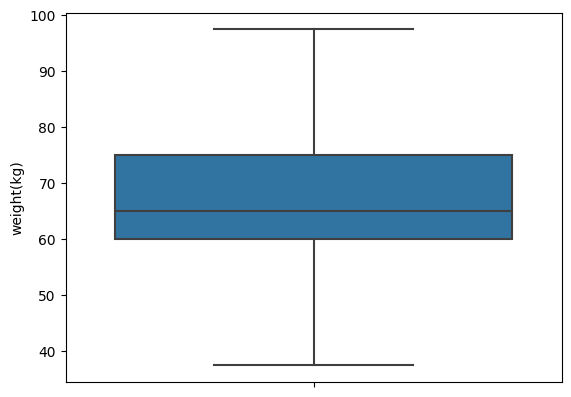

In [18]:
sns.boxplot(df, y='weight(kg)')

In [19]:
sns.boxplot(df, y='waist(cm)')

<Axes: ylabel='waist(cm)'>

In [20]:
waist_q1 = np.percentile(df['waist(cm)'], q=25)
waist_q3 = np.percentile(df['waist(cm)'], q=75)
waist_iqr = waist_q3 - waist_q1
lower_waist = waist_q1 - (1.5 * waist_iqr)
upper_waist = waist_q3 + (1.5 * waist_iqr)

In [21]:
df['waist(cm)'] = np.where(df['waist(cm)'] > upper_waist, upper_waist, df['waist(cm)'])
df['waist(cm)'] = np.where(df['waist(cm)'] < lower_waist, lower_waist, df['waist(cm)'])

<Axes: ylabel='waist(cm)'>

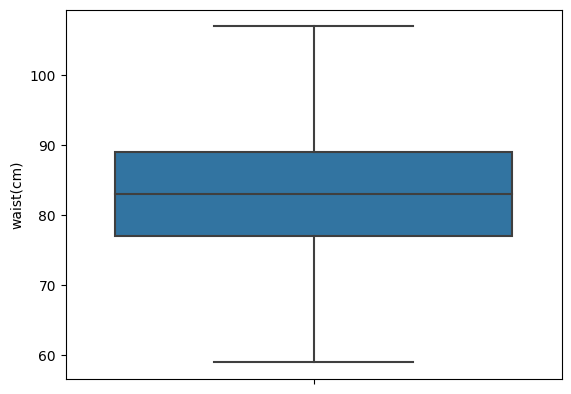

In [22]:
sns.boxplot(df, y='waist(cm)')

In [23]:
sns.boxplot(df, y='eyesight(left)')

<Axes: ylabel='eyesight(left)'>

In [24]:
df['eyesight(left)'].value_counts()

eyesight(left)
1.0    37380
1.2    36618
1.5    21550
0.9    15212
0.8    15078
0.7    13124
0.6     6769
0.5     5599
0.4     3337
0.3     2235
0.2      922
0.1      710
2.0      557
9.9      132
1.6       19
1.3        9
1.8        2
1.9        1
1.1        1
1.7        1
Name: count, dtype: int64

In [25]:
eyeleft_q1 = np.percentile(df['eyesight(left)'], q=25)
eyeleft_q3 = np.percentile(df['eyesight(left)'], q=75)
eyeleft_iqr = eyeleft_q3 - eyeleft_q1
lower_eyeleft = eyeleft_q1 - (1.5 * eyeleft_iqr)
upper_eyeleft = eyeleft_q3 + (1.5 * eyeleft_iqr)

In [26]:
df['eyesight(left)'] = np.where(df['eyesight(left)'] > upper_eyeleft, upper_eyeleft, df['eyesight(left)'])
df['eyesight(left)'] = np.where(df['eyesight(left)'] < lower_eyeleft, lower_eyeleft, df['eyesight(left)'])

In [27]:
sns.boxplot(df, y='eyesight(left)')

<Axes: ylabel='eyesight(left)'>

<Axes: ylabel='eyesight(right)'>

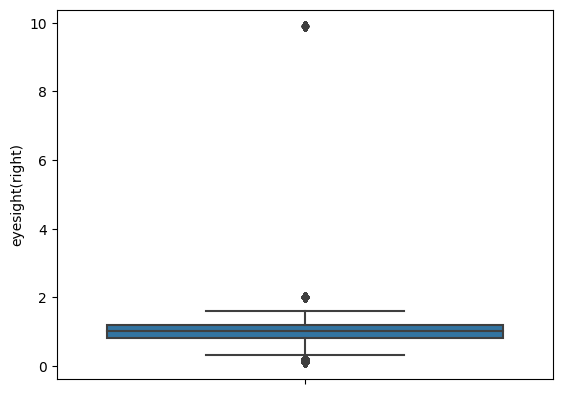

In [28]:
sns.boxplot(df, y='eyesight(right)')

In [29]:
eyeright_q1 = np.percentile(df['eyesight(right)'], q=25)
eyeright_q3 = np.percentile(df['eyesight(right)'], q=75)
eyeright_iqr = eyeright_q3 - eyeright_q1
lower_eyeright = eyeright_q1 - (1.5 * eyeright_iqr)
upper_eyeright = eyeright_q3 + (1.5 * eyeright_iqr)

In [30]:
df['eyesight(right)'] = np.where(df['eyesight(right)'] > upper_eyeright, upper_eyeright, df['eyesight(right)'])
df['eyesight(right)'] = np.where(df['eyesight(right)'] < lower_eyeright, lower_eyeright, df['eyesight(right)'])

<Axes: ylabel='eyesight(right)'>

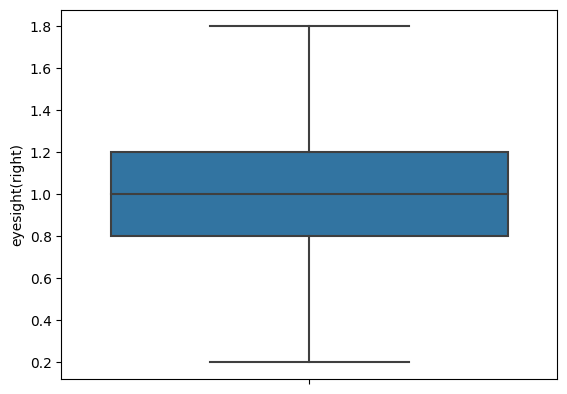

In [31]:
sns.boxplot(df, y='eyesight(right)')

<Axes: ylabel='hearing(left)'>

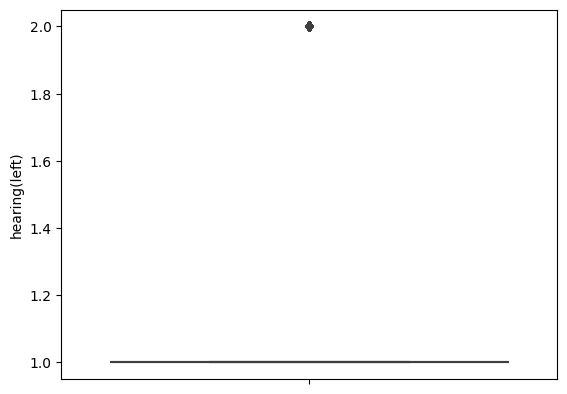

In [32]:
sns.boxplot(df, y='hearing(left)')

In [33]:
df['hearing(left)'].value_counts()

hearing(left)
1    155438
2      3818
Name: count, dtype: int64

In [34]:
df['hearing(right)'].value_counts()

hearing(right)
1    155526
2      3730
Name: count, dtype: int64

<Axes: ylabel='systolic'>

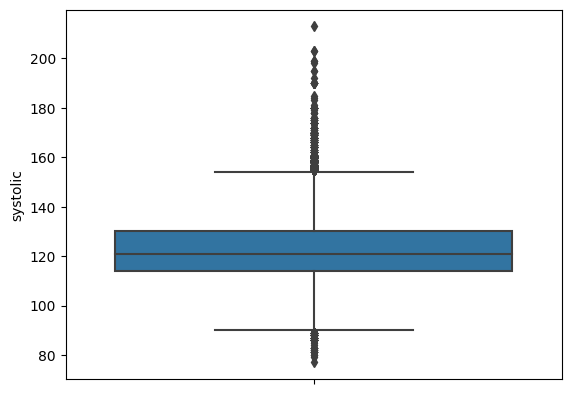

In [35]:
sns.boxplot(df, y='systolic')

In [36]:
systolic_q1 = np.percentile(df['systolic'], q=25)
systolic_q3 = np.percentile(df['systolic'], q=75)
systolic_iqr = systolic_q3 - systolic_q1
lower_systolic = systolic_q1 - (1.5 * systolic_iqr)
upper_systolic = systolic_q3 + (1.5 * systolic_iqr)

In [37]:
df['systolic'] = np.where(df['systolic'] > upper_systolic, upper_systolic, df['systolic'])
df['systolic'] = np.where(df['systolic'] < lower_systolic, lower_systolic, df['systolic'])

<Axes: ylabel='systolic'>

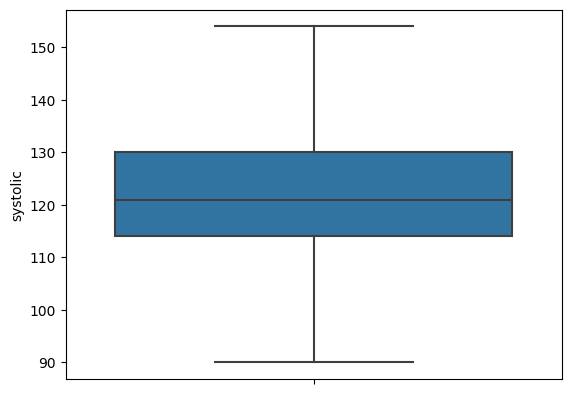

In [38]:
sns.boxplot(df, y='systolic')

<Axes: ylabel='relaxation'>

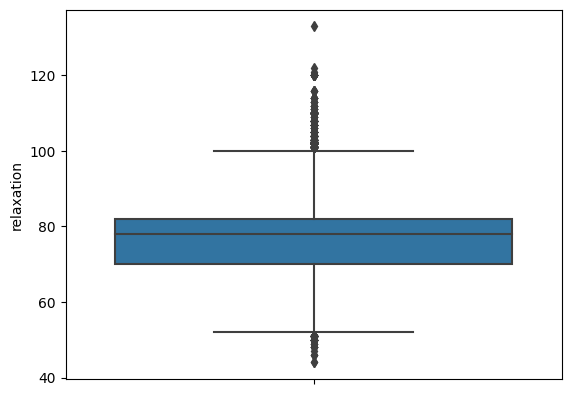

In [39]:
sns.boxplot(df, y='relaxation')

In [40]:
relaxation_q1 = np.percentile(df['relaxation'], q=25)
relaxation_q3 = np.percentile(df['relaxation'], q=75)
relaxation_iqr = relaxation_q3 - relaxation_q1
lower_relaxation = relaxation_q1 - (1.5 * relaxation_iqr)
upper_relaxation = relaxation_q3 + (1.5 * relaxation_iqr)

In [41]:
df['relaxation'] = np.where(df['relaxation'] > upper_relaxation, upper_relaxation, df['relaxation'])
df['relaxation'] = np.where(df['relaxation'] < lower_relaxation, lower_relaxation, df['relaxation'])

<Axes: ylabel='relaxation'>

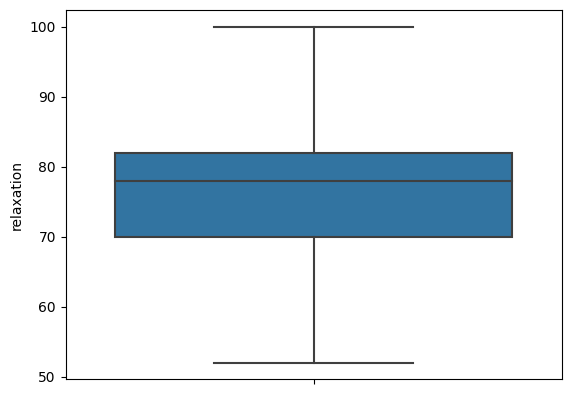

In [42]:
sns.boxplot(df, y='relaxation')

<Axes: ylabel='fasting blood sugar'>

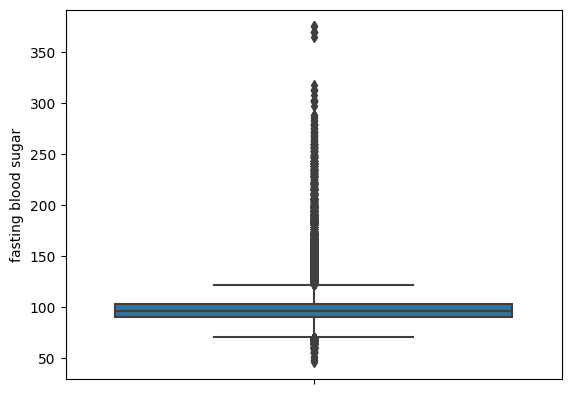

In [43]:
sns.boxplot(df, y='fasting blood sugar')

In [44]:
sugar_q1 = np.percentile(df['fasting blood sugar'], q=25)
sugar_q3 = np.percentile(df['fasting blood sugar'], q=75)
sugar_iqr = sugar_q3 - sugar_q1
lower_sugar = sugar_q1 - (1.5 * sugar_iqr)
upper_sugar = sugar_q3 + (1.5 * sugar_iqr)

In [45]:
df['fasting blood sugar'] = np.where(df['fasting blood sugar'] > upper_sugar, upper_sugar, df['fasting blood sugar'])
df['fasting blood sugar'] = np.where(df['fasting blood sugar'] < lower_sugar, lower_sugar, df['fasting blood sugar'])

In [46]:
sns.boxplot(df, y='fasting blood sugar')

<Axes: ylabel='fasting blood sugar'>

In [47]:
df.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

<Axes: ylabel='Cholesterol'>

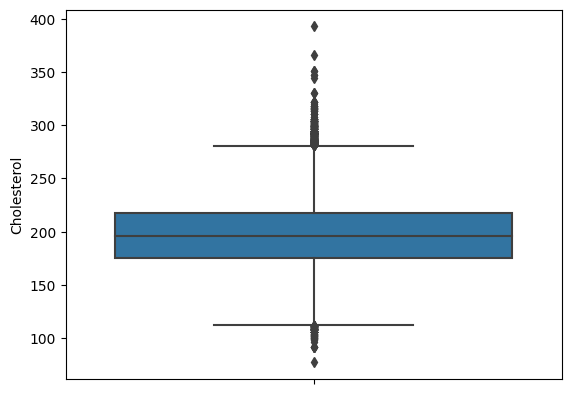

In [48]:
sns.boxplot(df, y='Cholesterol')

In [49]:
chol_q1 = np.percentile(df['Cholesterol'], q=25)
chol_q3 = np.percentile(df['Cholesterol'], q=75)
chol_iqr = chol_q3 - chol_q1
lower_chol = chol_q1 - (1.5 * chol_iqr)
upper_chol = chol_q3 + (1.5 * chol_iqr)

In [50]:
df['Cholesterol'] = np.where(df['Cholesterol'] > upper_chol, upper_chol, df['Cholesterol'])
df['Cholesterol'] = np.where(df['Cholesterol'] < lower_chol, lower_chol, df['Cholesterol'])

<Axes: ylabel='Cholesterol'>

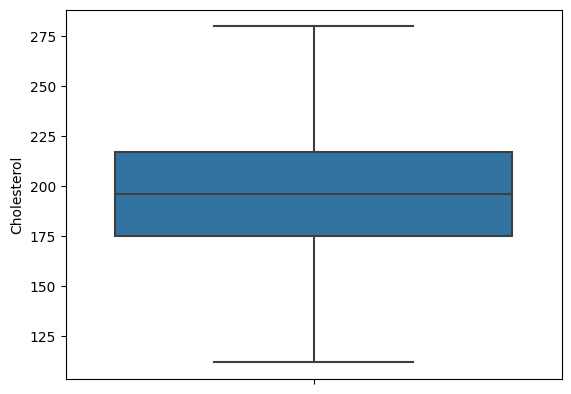

In [51]:
sns.boxplot(df, y='Cholesterol')

<Axes: ylabel='triglyceride'>

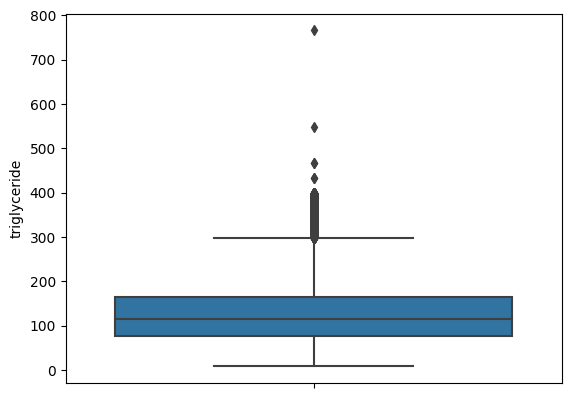

In [52]:
sns.boxplot(df, y='triglyceride')

In [53]:
triglyceride_q1 = np.percentile(df['triglyceride'], q=25)
triglyceride_q3 = np.percentile(df['triglyceride'], q=75)
triglyceride_iqr = triglyceride_q3 - triglyceride_q1
lower_triglyceride = triglyceride_q1 - (1.5 * triglyceride_iqr)
upper_triglyceride = triglyceride_q3 + (1.5 * triglyceride_iqr)

In [54]:
df['triglyceride'] = np.where(df['triglyceride'] > upper_triglyceride, upper_triglyceride, df['triglyceride'])
df['triglyceride'] = np.where(df['triglyceride'] < lower_triglyceride, lower_triglyceride, df['triglyceride'])

<Axes: ylabel='triglyceride'>

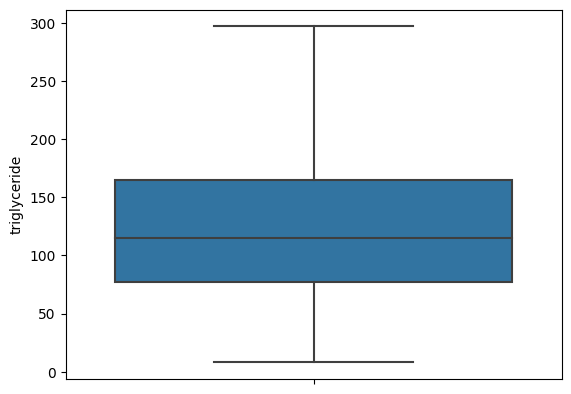

In [55]:
sns.boxplot(df, y='triglyceride')

In [56]:
sns.boxplot(df, y='HDL')

<Axes: ylabel='HDL'>

In [57]:
hdl_q1 = np.percentile(df['HDL'], q=25)
hdl_q3 = np.percentile(df['HDL'], q=75)
hdl_iqr = hdl_q3 - hdl_q1
lower_hdl = hdl_q1 - (1.5 * hdl_iqr)
upper_hdl = hdl_q3 + (1.5 * hdl_iqr)

In [58]:
df['HDL'].value_counts()

HDL
47     5431
46     5200
44     4983
48     4968
49     4939
       ... 
18        1
9         1
123       1
118       1
22        1
Name: count, Length: 108, dtype: int64

<Axes: ylabel='LDL'>

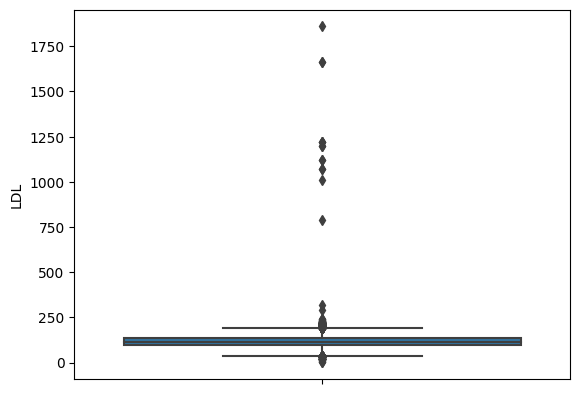

In [59]:
sns.boxplot(df, y='LDL')

In [60]:
df['LDL'].describe()

count    159256.000000
mean        114.607682
std          28.158931
min           1.000000
25%          95.000000
50%         114.000000
75%         133.000000
max        1860.000000
Name: LDL, dtype: float64

In [61]:
ldl_q1 = np.percentile(df['LDL'], q=25)
ldl_q3 = np.percentile(df['LDL'], q=75)
ldl_iqr = ldl_q3 - ldl_q1
lower_ldl = ldl_q1 - (1.5 * ldl_iqr)
upper_ldl = ldl_q3 + (1.5 * ldl_iqr)

In [62]:
lower_ldl

38.0

In [63]:
upper_ldl

190.0

<Axes: ylabel='hemoglobin'>

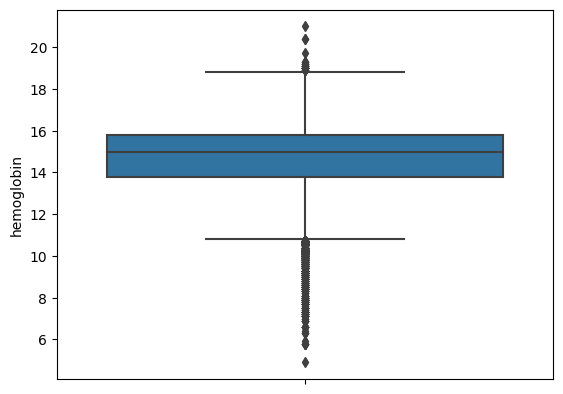

In [64]:
sns.boxplot(df, y='hemoglobin')

In [65]:
hemoglobin_q1 = np.percentile(df['hemoglobin'], q=25)
hemoglobin_q3 = np.percentile(df['hemoglobin'], q=75)
hemoglobin_iqr = hemoglobin_q3 - hemoglobin_q1
lower_hemoglobin = hemoglobin_q1 - (1.5 * hemoglobin_iqr)
upper_hemoglobin = hemoglobin_q3 + (1.5 * hemoglobin_iqr)

In [66]:
df['hemoglobin'] = np.where(df['hemoglobin'] > upper_hemoglobin, upper_hemoglobin, df['hemoglobin'])
df['hemoglobin'] = np.where(df['hemoglobin'] < lower_hemoglobin, lower_hemoglobin, df['hemoglobin'])

In [67]:
sns.boxplot(df, y='hemoglobin')

<Axes: ylabel='hemoglobin'>

<Axes: ylabel='Urine protein'>

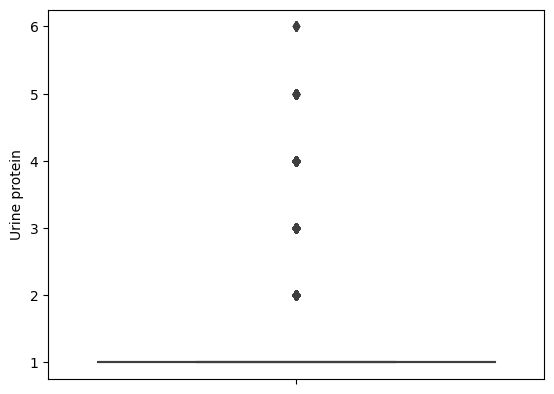

In [68]:
sns.boxplot(df, y='Urine protein')

In [69]:
df['Urine protein'].value_counts()

Urine protein
1    150862
2      5609
3      2228
4       477
5        74
6         6
Name: count, dtype: int64

<Axes: ylabel='serum creatinine'>

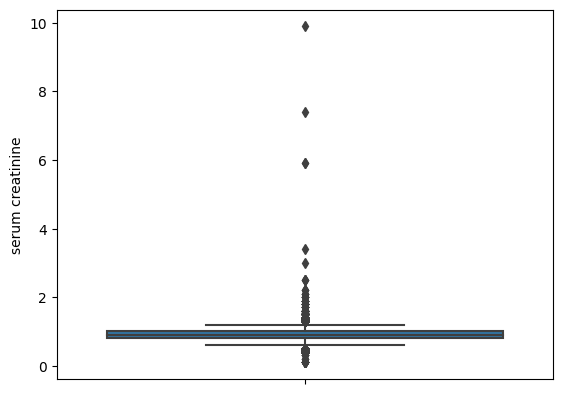

In [70]:
sns.boxplot(df, y='serum creatinine')

In [71]:
df['serum creatinine'].describe()

count    159256.000000
mean          0.892764
std           0.179346
min           0.100000
25%           0.800000
50%           0.900000
75%           1.000000
max           9.900000
Name: serum creatinine, dtype: float64

<Axes: ylabel='AST'>

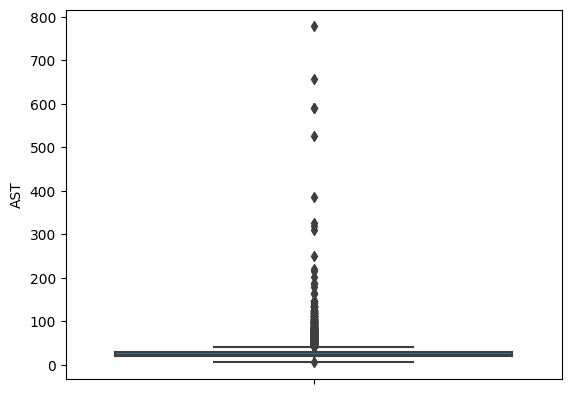

In [72]:
sns.boxplot(df, y='AST')

In [73]:
df['AST'].describe()

count    159256.000000
mean         25.516853
std           9.464882
min           6.000000
25%          20.000000
50%          24.000000
75%          29.000000
max         778.000000
Name: AST, dtype: float64

In [74]:
sns.boxplot(df, y='ALT')

<Axes: ylabel='ALT'>

In [75]:
df['ALT'].describe()

count    159256.000000
mean         26.550296
std          17.753070
min           1.000000
25%          16.000000
50%          22.000000
75%          32.000000
max        2914.000000
Name: ALT, dtype: float64

In [76]:
sns.boxplot(df, y='Gtp')

<Axes: ylabel='Gtp'>

In [77]:
df['Gtp'].describe()

count    159256.000000
mean         36.216004
std          31.204643
min           2.000000
25%          18.000000
50%          27.000000
75%          44.000000
max         999.000000
Name: Gtp, dtype: float64

In [78]:
df.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [79]:
df['dental caries'].value_counts()

dental caries
0    127724
1     31532
Name: count, dtype: int64

In [80]:
df.sample(10)

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
88158   55.0       165.0        70.0       92.0             0.9   
122088  65.0       150.0        55.0       82.0             0.9   
6406    40.0       175.0        80.0       77.0             1.0   
103317  60.0       150.0        50.0       71.0             0.2   
61232   35.0       170.0        55.0       68.0             1.2   
22136   45.0       170.0        65.0       84.0             1.0   
130502  50.0       160.0        75.0       98.0             1.0   
150055  35.0       170.0        75.0       90.0             1.5   
81115   40.0       170.0        65.0       80.0             1.5   
73736   50.0       150.0        45.0       67.0             1.0   

        eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
88158               1.0              2               2     145.0       100.0   
122088              0.8              1               1     154.0        95.0   
6406                1.2              1               1     122.0        78.0   
103317              1.0              1               1      94.0        58.0   
61232               1.0              1               1     100.0        60.0   
22136               1.2              1               1     110.0        70.0   
130502              1.0              1               1     128.0        79.0   
150055              1.2              1               1     130.0        80.0   
81115               1.2              1               1     120.0        70.0   
73736               1.0              1               1      98.0        64.0   

        fasting blood sugar  Cholesterol  triglyceride  HDL  LDL  hemoglobin  \
88158                 114.0        180.0         163.0   54   94        15.1   
122088                 93.0        194.0         122.0   55  115        15.3   
6406                   91.0        229.0         123.0   58  147        15.3   
103317                 87.0        227.0         127.0   59  143        13.6   
61232                  76.0        203.0          39.0   82  113        14.6   
22136                 101.0        220.0         181.0   37  148        15.4   
130502                122.5        163.0         125.0   44   94        14.7   
150055                 94.0        183.0         146.0   51  103        15.0   
81115                 103.0        254.0         290.0   40  154        15.4   
73736                  90.0        190.0         148.0   61   99        12.1   

        Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  smoking  
88158               1               1.2   29   44   80              0        0  
122088              1               0.8   23   20   18              1        0  
6406                1               1.1   20   17    9              0        0  
103317              1               0.8   25   17   13              0        0  
61232               1               0.8   16   13   19              0        1  
22136               1               0.8   20   19   52              0        1  
130502              1               1.1   23   23   16              0        1  
150055              1               1.0   32   44   24              1        0  
81115               1               1.1   29   25   48              0        0  
73736               1               0.9   14    8   21              0        0

In [81]:
X = df.drop('smoking', axis=1)
y = df['smoking']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [82]:
scaled_X_train

array([[-0.36272423, -1.7415619 , -1.78644933, ..., -0.63579573,
        -0.74472219, -0.49720046],
       [-0.36272423, -0.60188345, -0.57230795, ...,  2.34230216,
        -0.07002137, -0.49720046],
       [-0.78674872,  0.53779501,  1.04654724, ...,  0.24660364,
         3.8175405 ,  2.0112612 ],
       ...,
       [-1.63479769,  0.53779501, -0.97702174, ..., -0.80124561,
        -0.48769331, -0.49720046],
       [-1.63479769, -0.03204422, -0.57230795, ..., -0.30489596,
        -0.39130747, -0.49720046],
       [ 1.33337372,  0.53779501,  2.46304552, ...,  2.50775204,
        -0.03789276, -0.49720046]])

In [82]:
rforest = RandomForestClassifier(random_state=101, oob_score=True)

In [ ]:

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5],
              'min_samples_split': [20, 25],
              'min_samples_leaf' : [30, 35, 40]
             }
rforest_grid = GridSearchCV(rforest, cv=10, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
rforest_grid.fit(scaled_X_train, y_train)
print('Best Parameters using grid search: \n', rforest_grid.best_params_)

In [ ]:
rforest.set_params(criterion = 'gini',
                  min_samples_leaf = 40,
                  min_samples_split = 20,
                  max_depth = 5)

In [ ]:
min_estimators = 300
max_estimators = 500

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rforest.set_params(n_estimators=i)
    rforest.fit(scaled_X_train, y_train)
    rf_predict = rforest.predict(scaled_X_test)
    error_rate[i] = 1 - accuracy_score(y_test, rf_predict)

In [ ]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.xlim(300, 500)
plt.title('OOB Error Rate Across various Forest sizes \n(From 300 to 500 trees)')

In [ ]:
rforest.set_params(n_estimators=410)
rforest.fit(scaled_X_train, y_train)
y_predict = rforest.predict(scaled_X_test)


In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
ConfusionMatrixDisplay.from_estimator(rforest, scaled_X_test, y_test)

In [ ]:
RocCurveDisplay.from_estimator(rforest, scaled_X_test, y_test)

In [83]:
gradboost = GradientBoostingClassifier()

In [ ]:
param_grid = {'max_depth': [3, 4, 5, 6],
              'min_samples_split': [20, 25],
              'min_samples_leaf' : [30, 35, 40]
             }
gradboost_grid = GridSearchCV(gradboost, cv=10, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
gradboost_grid.fit(scaled_X_train, y_train)
print('Best Parameters using grid search: \n', gradboost_grid.best_params_)

In [84]:
gradboost.set_params(min_samples_leaf = 35,
                  min_samples_split = 20,
                  max_depth = 7)

GradientBoostingClassifier(max_depth=7, min_samples_leaf=35,
                           min_samples_split=20)

In [ ]:
estimators = [100, 150, 200, 250, 300, 350, 400, 450, 500]

error_rate = {}

for i in estimators:
    gradboost.set_params(n_estimators=i)
    gradboost.fit(scaled_X_train, y_train)
    grad_predict = gradboost.predict(scaled_X_test)
    error_rate[i] = 1 - accuracy_score(y_test, grad_predict)

In [ ]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.xlim(100, 500)
plt.title('OOB Error Rate Across various Forest sizes \n(From 100 to 500 trees)')

In [85]:
estimators = [550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]

error_rate = {}

for i in estimators:
    gradboost.set_params(n_estimators=i)
    gradboost.fit(scaled_X_train, y_train)
    grad_predict = gradboost.predict(scaled_X_test)
    error_rate[i] = 1 - accuracy_score(y_test, grad_predict)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 550 to 1000 trees)')

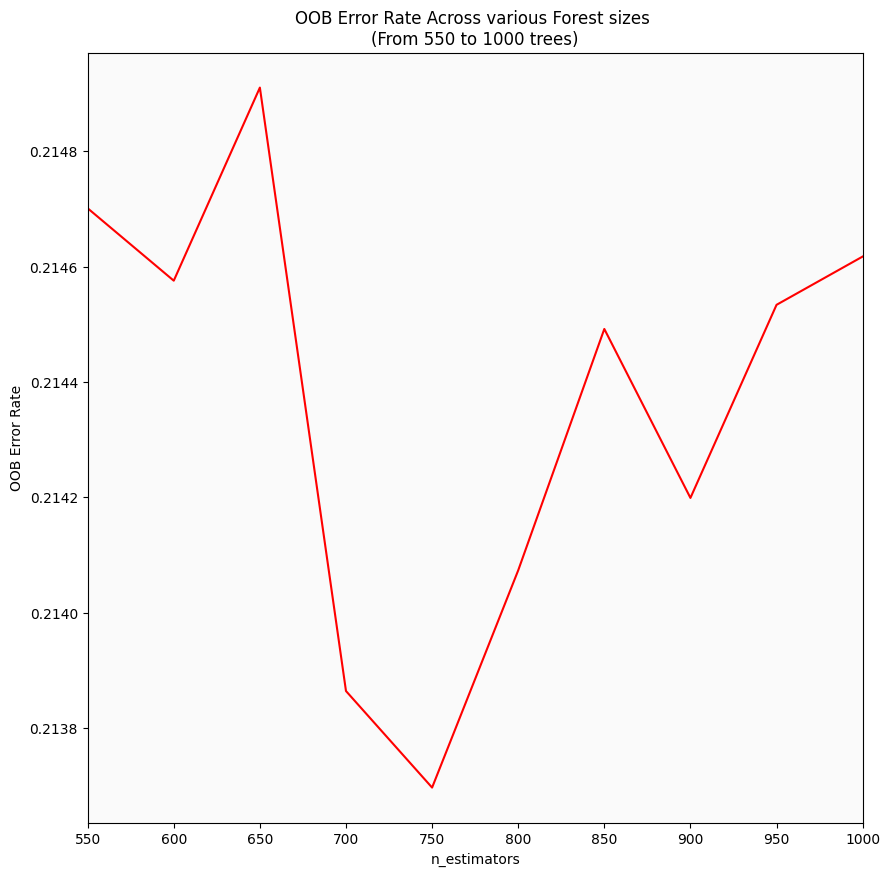

In [86]:
oob_series = pd.Series(error_rate)
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.xlim(550, 1000)
plt.title('OOB Error Rate Across various Forest sizes \n(From 550 to 1000 trees)')

In [87]:
gradboost.set_params(n_estimators = 750)

GradientBoostingClassifier(max_depth=7, min_samples_leaf=35,
                           min_samples_split=20, n_estimators=750)

In [88]:
gradboost.fit(scaled_X_train, y_train)
y_predict = gradboost.predict(scaled_X_test)

In [89]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80     13401
           1       0.73      0.80      0.77     10488

    accuracy                           0.79     23889
   macro avg       0.78      0.79      0.78     23889
weighted avg       0.79      0.79      0.79     23889



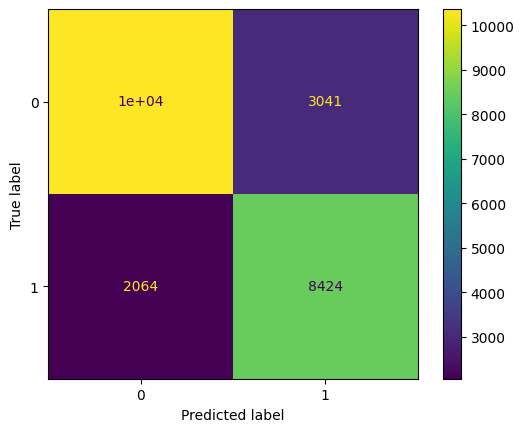

In [92]:
ConfusionMatrixDisplay.from_estimator(gradboost, scaled_X_test, y_test)

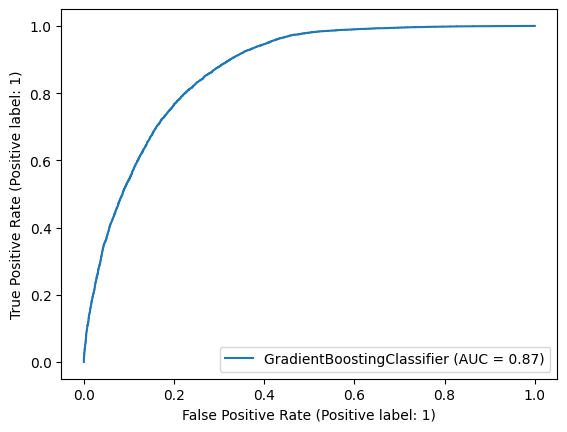

In [93]:
RocCurveDisplay.from_estimator(gradboost, scaled_X_test, y_test)

In [95]:
df_test = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')
df_test.set_index('id', inplace=True)
df_test['age'] = np.where(df_test['age'] > upper_age, upper_age, df_test['age'])
df_test['age'] = np.where(df_test['age'] < lower_age, lower_age, df_test['age'])
df_test['height(cm)'] = np.where(df_test['height(cm)'] > upper_height, upper_height, df_test['height(cm)'])
df_test['height(cm)'] = np.where(df_test['height(cm)'] < lower_height, lower_height, df_test['height(cm)'])
df_test['weight(kg)'] = np.where(df_test['weight(kg)'] > upper_weight, upper_weight, df_test['weight(kg)'])
df_test['weight(kg)'] = np.where(df_test['weight(kg)'] < lower_weight, lower_weight, df_test['weight(kg)'])
df_test['waist(cm)'] = np.where(df_test['waist(cm)'] > upper_waist, upper_waist, df_test['waist(cm)'])
df_test['waist(cm)'] = np.where(df_test['waist(cm)'] < lower_waist, lower_waist, df_test['waist(cm)'])
df_test['eyesight(left)'] = np.where(df_test['eyesight(left)'] > upper_eyeleft, upper_eyeleft, df_test['eyesight(left)'])
df_test['eyesight(left)'] = np.where(df_test['eyesight(left)'] < lower_eyeleft, lower_eyeleft, df_test['eyesight(left)'])
df_test['eyesight(right)'] = np.where(df_test['eyesight(right)'] > upper_eyeright, upper_eyeright, df_test['eyesight(right)'])
df_test['eyesight(right)'] = np.where(df_test['eyesight(right)'] < lower_eyeright, lower_eyeright, df_test['eyesight(right)'])
df_test['systolic'] = np.where(df_test['systolic'] > upper_systolic, upper_systolic, df_test['systolic'])
df_test['systolic'] = np.where(df_test['systolic'] < lower_systolic, lower_systolic, df_test['systolic'])
df_test['relaxation'] = np.where(df_test['relaxation'] > upper_relaxation, upper_relaxation, df_test['relaxation'])
df_test['relaxation'] = np.where(df_test['relaxation'] < lower_relaxation, lower_relaxation, df_test['relaxation'])
df_test['fasting blood sugar'] = np.where(df_test['fasting blood sugar'] > upper_sugar, upper_sugar, df_test['fasting blood sugar'])
df_test['fasting blood sugar'] = np.where(df_test['fasting blood sugar'] < lower_sugar, lower_sugar, df_test['fasting blood sugar'])
df_test['Cholesterol'] = np.where(df_test['Cholesterol'] > upper_chol, upper_chol, df_test['Cholesterol'])
df_test['Cholesterol'] = np.where(df_test['Cholesterol'] < lower_chol, lower_chol, df_test['Cholesterol'])
df_test['triglyceride'] = np.where(df_test['triglyceride'] > upper_triglyceride, upper_triglyceride, df_test['triglyceride'])
df_test['triglyceride'] = np.where(df_test['triglyceride'] < lower_triglyceride, lower_triglyceride, df_test['triglyceride'])
df_test['hemoglobin'] = np.where(df_test['hemoglobin'] > upper_hemoglobin, upper_hemoglobin, df_test['hemoglobin'])
df_test['hemoglobin'] = np.where(df_test['hemoglobin'] < lower_hemoglobin, lower_hemoglobin, df_test['hemoglobin'])
scaled_test_df = scaler.transform(df_test)
df_test['smoking'] = gradboost.predict_proba(scaled_test_df)[:,1]
df_test = df_test.reset_index()
df_test[['id', 'smoking']].to_csv('/kaggle/working/grad_outlier_output.csv', index=False)

<h2>Feature Engineering

In [60]:
df.sample(10)

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
108476   35         165          70       84.9             1.2   
4377     40         175          60       74.0             1.0   
149437   45         170          85      100.0             1.5   
124846   65         155          55       88.5             0.4   
63125    35         165          85       94.2             1.0   
37423    40         165          70       87.0             1.2   
57354    35         175          60       76.0             1.2   
99009    40         170          80       94.0             1.5   
77742    25         170          55       70.0             1.5   
10889    25         180          80       86.0             1.2   

        eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
108476              1.2              1               1       134          78   
4377                0.8              1               1       102          68   
149437              1.5              1               1       148          92   
124846              0.7              1               1       123          78   
63125               1.0              1               1       134          94   
37423               1.0              1               1       124          80   
57354               1.5              1               1       119          70   
99009               1.5              1               1       122          80   
77742               1.2              1               1       110          70   
10889               1.0              1               1       124          79   

        fasting blood sugar  Cholesterol  triglyceride  HDL  LDL  hemoglobin  \
108476                  102          236           183   44  155        17.2   
4377                    121          197            77   47  135        14.4   
149437                   92          153            97   59   74        14.6   
124846                   99          257           218   49  164        15.9   
63125                   130          220           140   51  141        15.2   
37423                   112          217           393   36  101        15.5   
57354                    93          154            81   60   77        16.6   
99009                    95          219           128   49  144        13.5   
77742                    87          158            45   77   73        16.2   
10889                    76          195           386   41   77        15.9   

        Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  smoking  
108476              1               0.8   24   41   19              0        1  
4377                1               0.9   20   19   35              0        1  
149437              1               1.0   35   45   28              0        0  
124846              1               1.0   26   29   72              0        0  
63125               1               1.0   18   18   43              0        1  
37423               1               0.9   30   43   39              0        1  
57354               1               1.0   18   10   24              1        1  
99009               1               0.7   17   18   17              0        1  
77742               1               0.9   15    9   20              0        1  
10889               1               1.2   25   37   36              1        0

In [63]:
df['height(m)'] = df['height(cm)'] / 100

In [64]:
df.sample(10)

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
151914   35         180          85       91.0             1.5   
136382   35         175          90       96.2             1.2   
57149    40         170          90       98.0             1.0   
42447    45         155          55       70.0             1.2   
112494   60         150          70       90.0             1.2   
4857     30         175          80       88.0             1.5   
97991    40         160          60       76.0             0.8   
157450   60         175          85       85.0             0.6   
88866    40         170          80       87.0             1.5   
40484    40         160          65       79.0             1.2   

        eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
151914              1.2              1               1       115          68   
136382              1.5              1               1       132          80   
57149               0.9              1               1       130          77   
42447               1.2              1               1       109          69   
112494              0.9              1               1       151          87   
4857                1.5              1               1       110          70   
97991               1.0              1               1       122          76   
157450              0.7              1               1       147          88   
88866               1.5              1               1       137          93   
40484               1.0              1               1       111          71   

        fasting blood sugar  Cholesterol  triglyceride  HDL  LDL  hemoglobin  \
151914                  110          219           206   52  125        16.6   
136382                  105          203            92   43  142        15.4   
57149                    97          162           222   42   76        13.8   
42447                    99          224           154   61  132        14.3   
112494                   81          205            51   54  141        13.9   
4857                    103          168           101   68   79        15.9   
97991                    87          169            67   81   75        12.9   
157450                  108          216           132   77  111        15.7   
88866                    91          195            82   59  120        16.1   
40484                   114          211           216   57  110        14.5   

        Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  \
151914              1               0.9   24   34   68              0   
136382              1               1.0   32   53   34              0   
57149               1               1.0   31   31   37              1   
42447               1               0.7   17   15   16              0   
112494              1               0.7   21   20   20              0   
4857                1               0.9   18   32   36              0   
97991               1               0.6   16   12   17              0   
157450              1               0.8   22   21   57              0   
88866               1               0.9   31   25   22              0   
40484               2               0.7   26   31   66              0   

        smoking  height(m)  
151914        1       1.80  
136382        0       1.75  
57149         1       1.70  
42447         0       1.55  
112494        0       1.50  
4857          1       1.75  
97991         0       1.60  
157450        0       1.75  
88866         1       1.70  
40484         0       1.60

In [65]:
df['bmi'] = df['weight(kg)']/(df['height(m)'] ** 2)

In [66]:
df.sample(10)

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
26959    40         170          80       97.0             1.5   
61502    60         150          50       70.0             0.7   
66493    45         170          75       80.0             1.2   
114264   40         165          55       72.0             0.6   
124155   30         175          75       87.0             1.5   
15311    65         155          55       79.0             0.7   
131580   40         155          45       65.0             1.2   
93153    50         170          80       89.0             1.0   
125295   50         165          70       90.0             1.0   
135874   20         170          90       87.0             1.0   

        eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
26959               1.5              1               1       120          88   
61502               0.8              1               1       116          78   
66493               1.2              1               1       129          78   
114264              0.9              1               1       134          75   
124155              1.2              1               1       110          70   
15311               0.7              1               1       127          64   
131580              1.0              1               1       106          65   
93153               0.9              1               1       143          97   
125295              0.7              1               1       106          63   
135874              1.2              1               1       125          70   

        fasting blood sugar  Cholesterol  triglyceride  HDL  LDL  hemoglobin  \
26959                    87          213           107   53  139        15.9   
61502                    81          223            87   68  137        13.9   
66493                    96          203           194   42  122        14.8   
114264                   75          184            41   63  112        13.7   
124155                   92          190           130   53  111        14.5   
15311                   119          134           161   35   68        14.4   
131580                   97          179            62   94   72        13.5   
93153                    97          216           264   48  114        16.3   
125295                   87          211            65   46  152        14.8   
135874                   88          128            68   47   68        15.9   

        Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  \
26959               1               0.9   21   27   25              1   
61502               1               0.8   26   15   19              0   
66493               1               1.0   22   31   37              1   
114264              1               0.5   21   19   14              0   
124155              1               0.9   38   63   34              0   
15311               1               0.9   28   20   52              1   
131580              1               0.8   25   14   11              0   
93153               1               1.1   26   30   32              1   
125295              1               0.9   23   22   20              0   
135874              1               0.8   31   39   35              0   

        smoking  height(m)        bmi  
26959         1       1.70  27.681661  
61502         0       1.50  22.222222  
66493         1       1.70  25.951557  
114264        0       1.65  20.202020  
124155        1       1.75  24.489796  
15311         1       1.55  22.892820  
131580        0       1.55  18.730489  
93153         1       1.70  27.681661  
125295        0       1.65  25.711662  
135874        1       1.70  31.141869

In [73]:
def map_bmi(bmi):
    if bmi <= 18.5:
        return 0
    elif bmi > 18.5 and bmi <= 24.9:
        return 1
    elif bmi > 24.9 and bmi <= 29.9:
        return 2
    else:
        return 3

In [74]:
df['bmi_cat'] = df['bmi'].map(lambda x: map_bmi(x))

In [75]:
df.sample(10)

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
128830   40         180          80       88.0             1.0   
6570     40         170          95      107.0             0.9   
38870    40         165          60       73.0             0.5   
89314    40         175          70       91.0             1.0   
119977   25         175          80       81.0             1.2   
72030    65         165          65       91.0             0.6   
67501    30         170          75       81.7             1.2   
6231     40         175          75       83.0             1.2   
119724   40         160          50       69.0             1.2   
135262   60         155          55       75.0             0.7   

        eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
128830              1.0              1               1       110          70   
6570                1.2              1               1       110          70   
38870               0.4              1               1       125          71   
89314               0.7              1               1       132          86   
119977              1.2              1               1       121          70   
72030               0.4              1               1       130          76   
67501               1.5              1               1       118          70   
6231                1.2              1               1       140         100   
119724              1.0              1               1       108          75   
135262              0.6              1               1       111          72   

        fasting blood sugar  Cholesterol  triglyceride  HDL  LDL  hemoglobin  \
128830                  115          199           217   32  124        15.2   
6570                    106          215           159   50  134        17.7   
38870                   104          167            89   60   90        12.6   
89314                   109          241           361   41  135        15.9   
119977                   99          173           226   61   66        15.2   
72030                   105          170            98   36  114        14.0   
67501                    97          181           154   48  136        16.0   
6231                    104          180           164   39  107        16.0   
119724                   94          145            52   61   74        13.4   
135262                  101          183           124   43  116        13.9   

        Urine protein  serum creatinine  AST  ALT  Gtp  dental caries  \
128830              1               0.8   23   18   33              0   
6570                1               1.1   38   69   52              0   
38870               1               0.4   33   32   32              0   
89314               1               0.9   23   43  118              0   
119977              1               0.9   33   32   50              0   
72030               1               1.0   29   21   32              0   
67501               1               0.8   22   24   49              0   
6231                1               0.8   24   33   37              0   
119724              1               0.6   18   14   12              0   
135262              1               0.8   17   16   58              0   

        smoking  height(m)        bmi  bmi_cat  
128830        0       1.80  24.691358        1  
6570          1       1.70  32.871972        3  
38870         0       1.65  22.038567        1  
89314         1       1.75  22.857143        1  
119977        0       1.75  26.122449        2  
72030         1       1.65  23.875115        1  
67501         1       1.70  25.951557        2  
6231          1       1.75  24.489796        1  
119724        0       1.60  19.531250        1  
135262        0       1.55  22.892820        1

<Axes: >

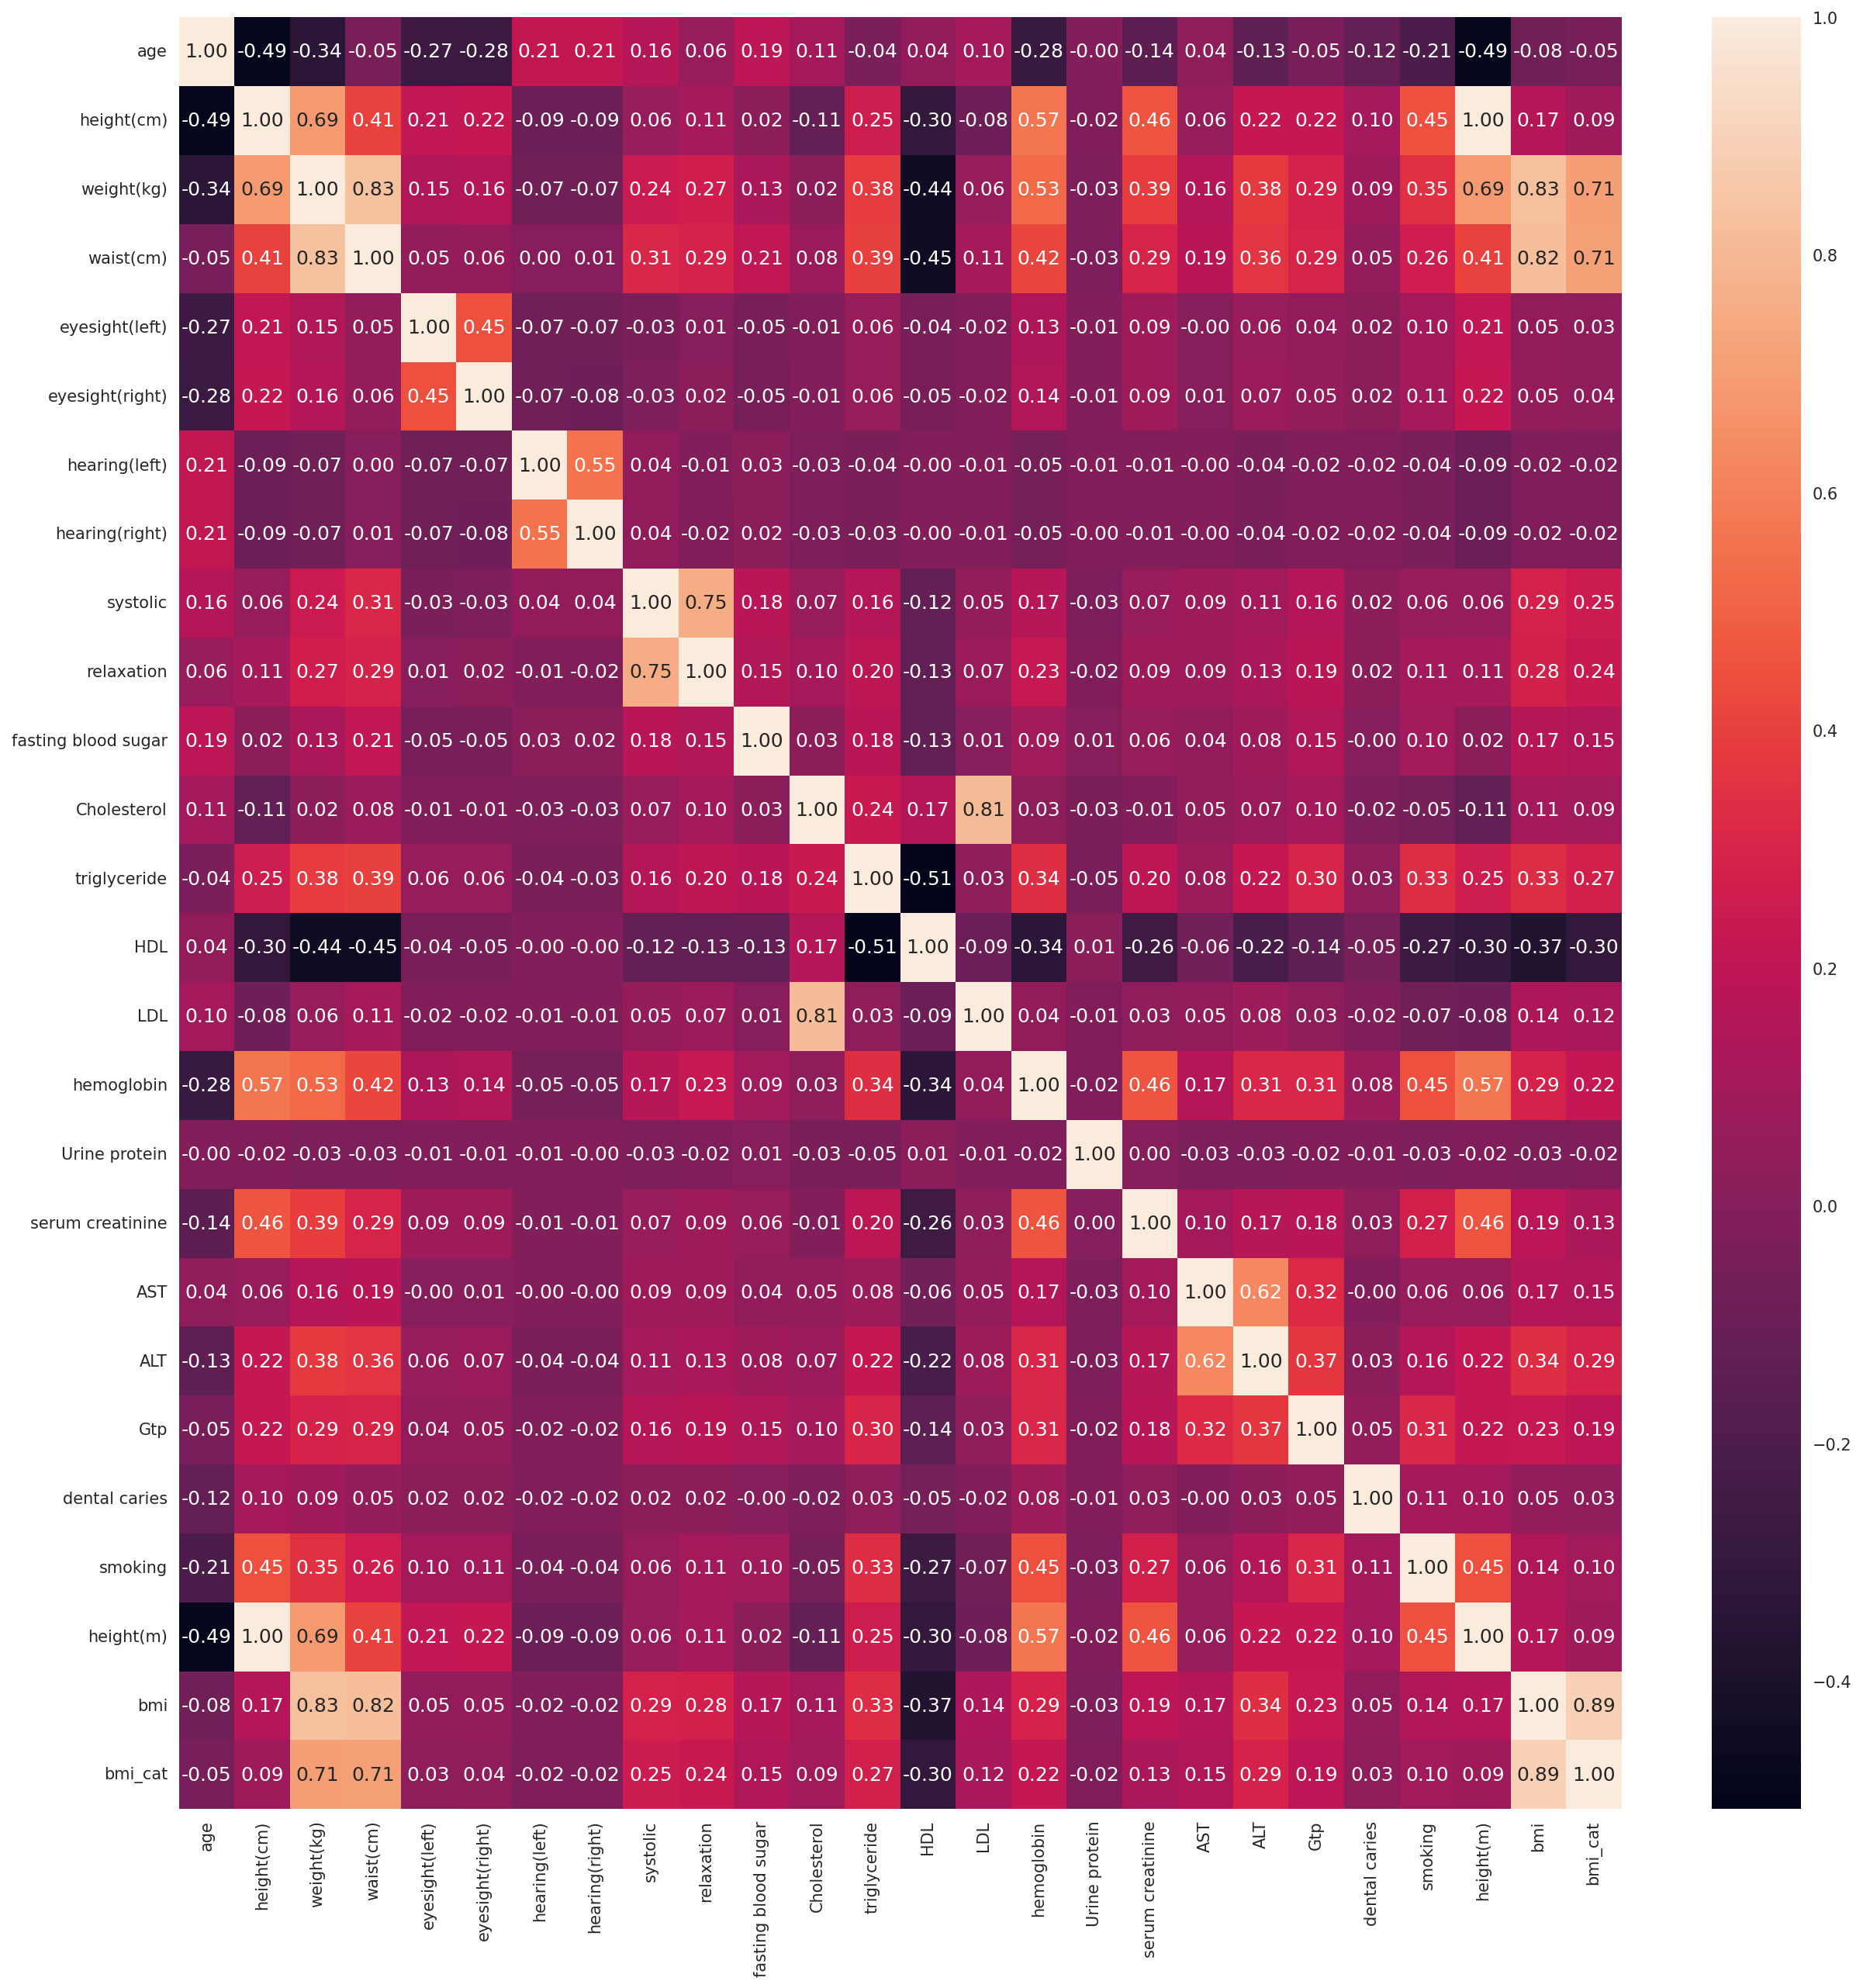

In [79]:
plt.figure(figsize=(20, 20), dpi=150)
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [80]:
plt.figure(figsize=(20, 20), dpi=150)
sns.heatmap(df.corr(method='spearman'), annot=True, fmt='.2f')

<Axes: >

In [86]:
df.drop(['height(m)', 'bmi', 'bmi_cat'], axis=1, inplace=True)

In [84]:
df['systolic'].value_counts()

systolic
130    11765
120    11749
110    11591
118     9686
124     4692
       ...  
84         1
183        1
185        1
181        1
79         1
Name: count, Length: 112, dtype: int64

In [87]:
def sys_map(systolic):
    if systolic <= 120:
        return 0
    elif systolic > 120 and systolic <=139:
        return 1
    else:
        return 2

In [89]:
df['systolic_cat'] = df['systolic'].map(lambda x: sys_map(x))

<Axes: >

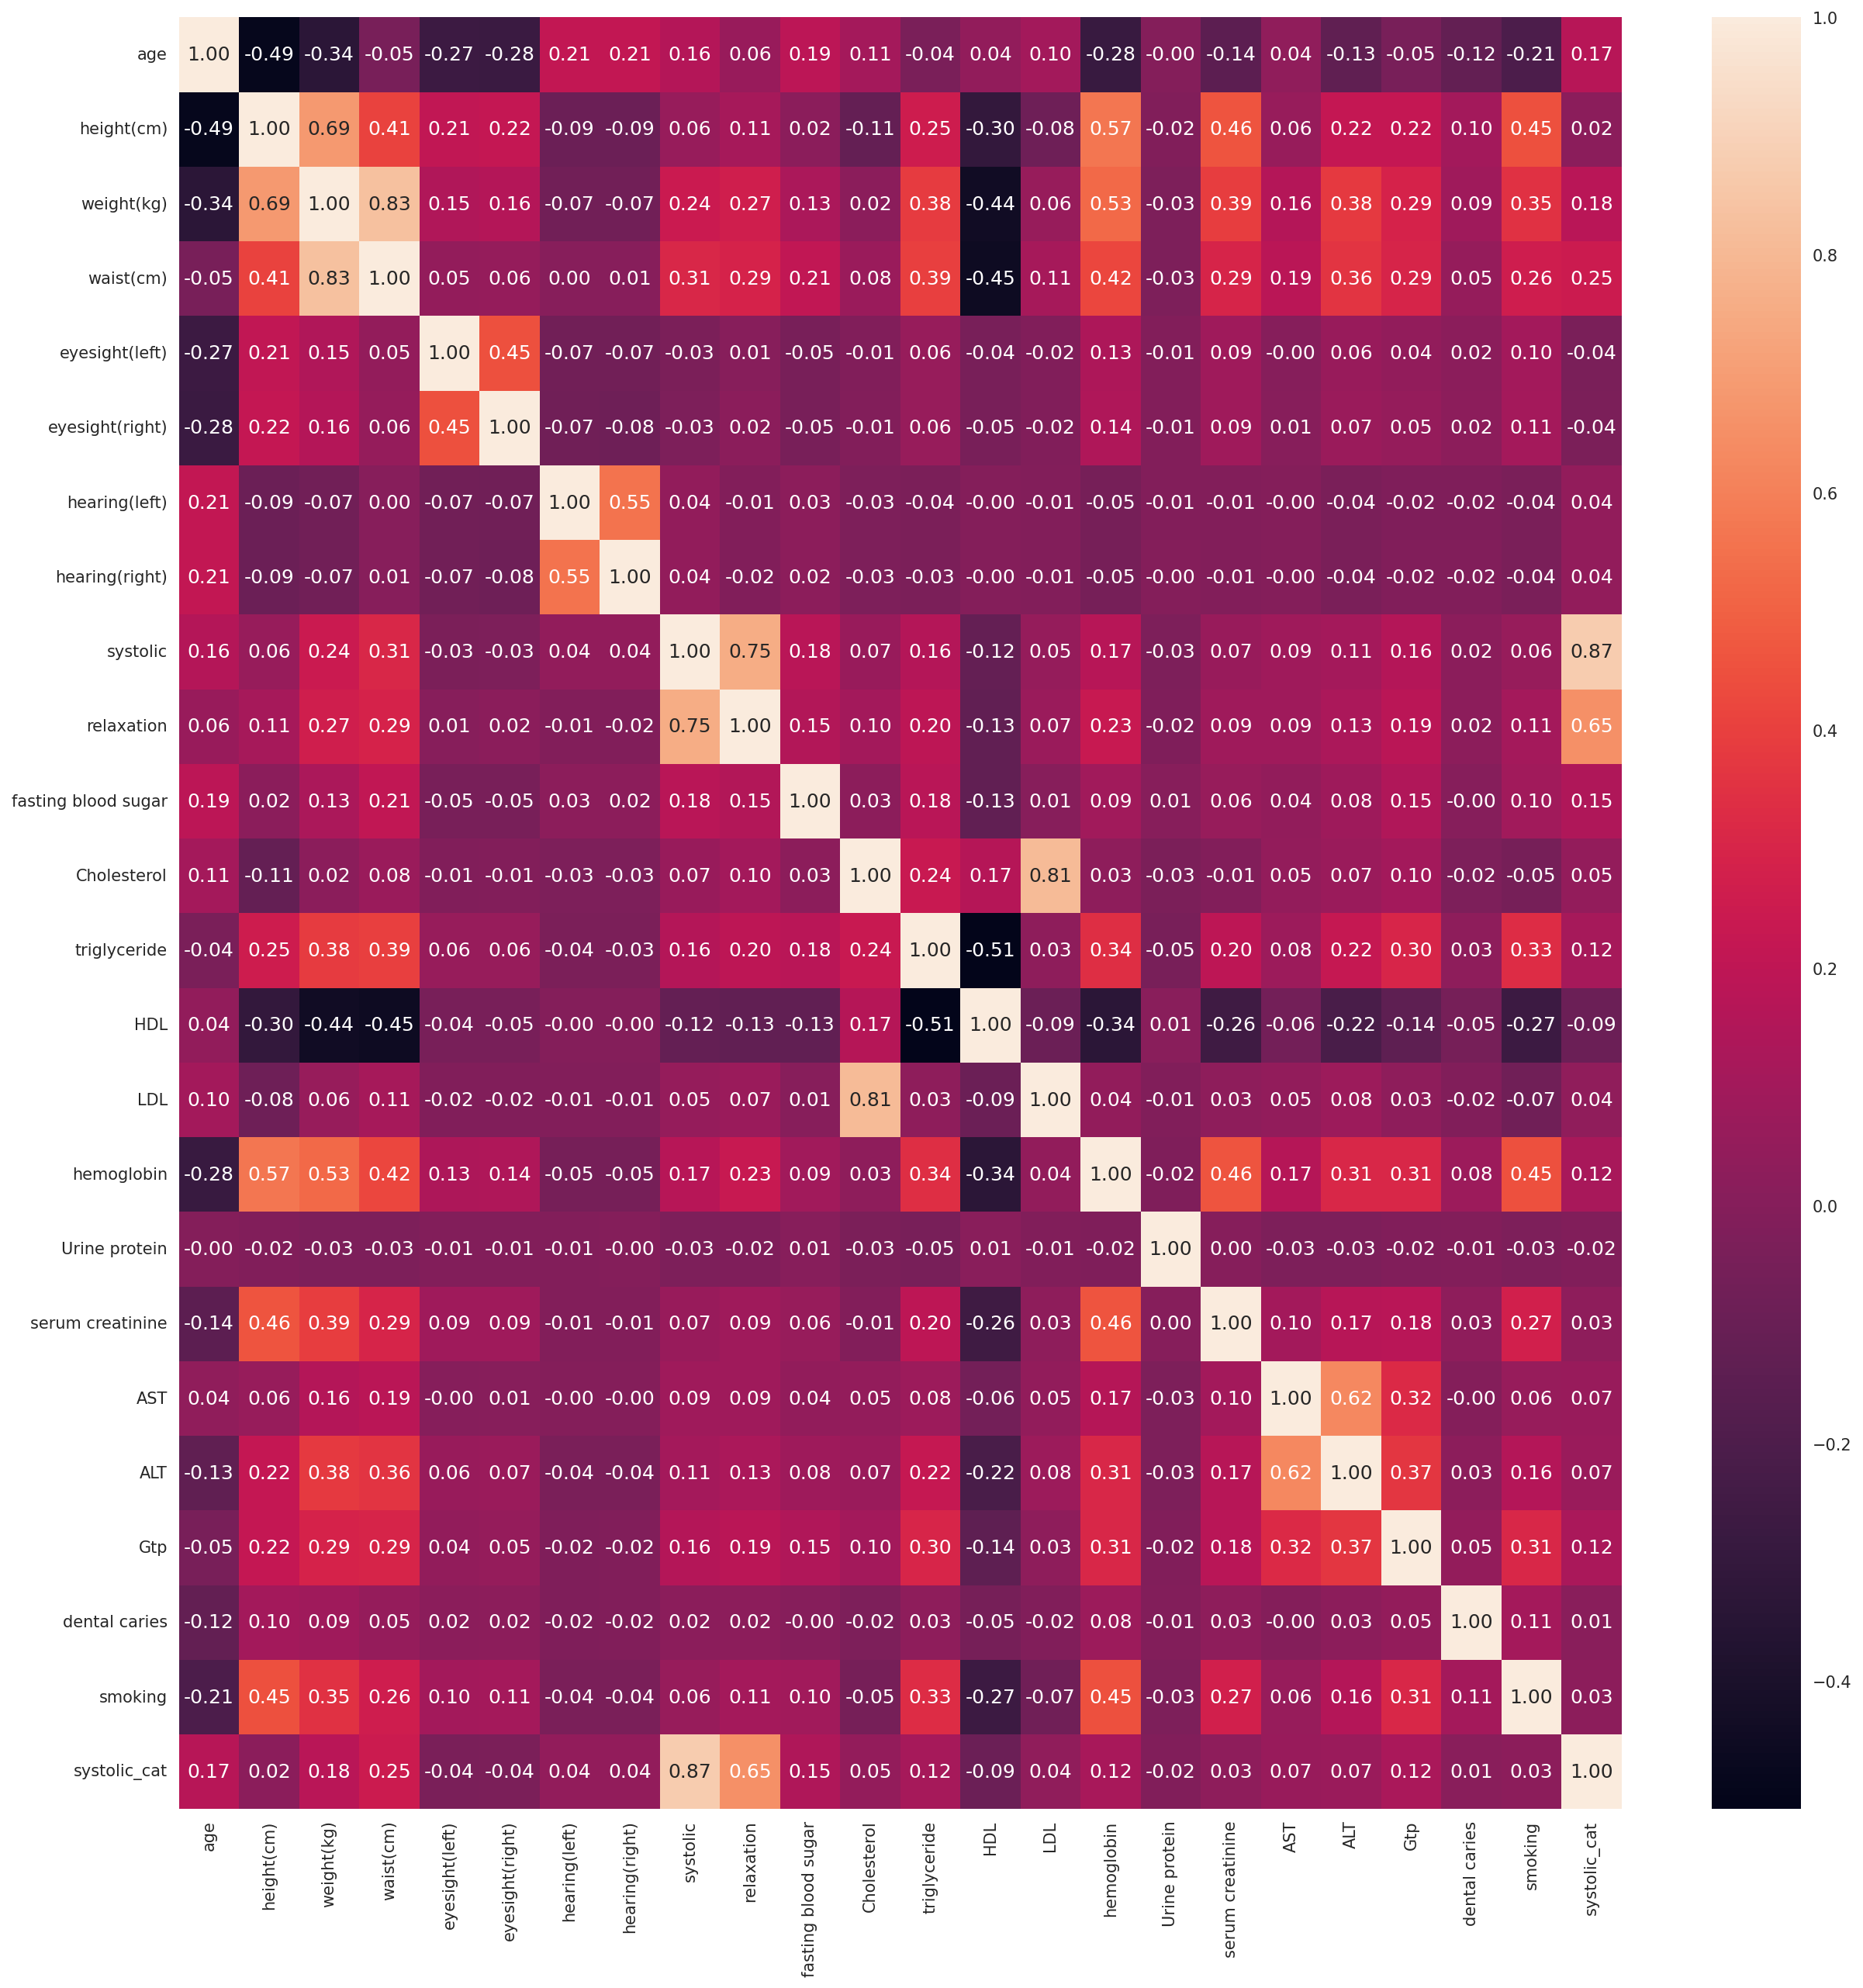

In [91]:
plt.figure(figsize=(20, 20), dpi=150)
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [62]:
for ele in df.columns:
    print('\n')
    print(ele)
    print(df[ele].nunique())



age
18


height(cm)
14


weight(kg)
28


waist(cm)
531


eyesight(left)
20


eyesight(right)
17


hearing(left)
2


hearing(right)
2


systolic
112


relaxation
75


fasting blood sugar
229


Cholesterol
227


triglyceride
392


HDL
108


LDL
222


hemoglobin
134


Urine protein
6


serum creatinine
28


AST
140


ALT
188


Gtp
362


dental caries
2


smoking
2


In [81]:
df['hearing(left)'].value_counts()

hearing(left)
1    155438
2      3818
Name: count, dtype: int64

In [83]:
sns.countplot(data=df, x='hearing(left)', hue='smoking', )

<Axes: xlabel='hearing(left)', ylabel='count'>